In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
#import utils
plt.ion()
plt.show()
dfa4= pd.read_csv("../../Taipei_14.csv")
dfa5= pd.read_csv("../../Taipei_15.csv")
dfa6= pd.read_csv("../../Taipei_16.csv")
dfa7= pd.read_csv("../../Taipei_17.csv")
dfa8= pd.read_csv("../../Taipei_18.csv")
df14 = dfa4.rename(columns={"PM2.5": "PM"})
df15 = dfa5.rename(columns={"PM2.5": "PM"})
df16 = dfa6.rename(columns={"PM2.5": "PM"})
df17 = dfa7.rename(columns={"PM2.5": "PM"})
df18 = dfa8.rename(columns={"PM2.5": "PM"})
df4= pd.DataFrame(df14)
df5= pd.DataFrame(df15)
df6= pd.DataFrame(df16)
df7= pd.DataFrame(df17)
df8= pd.DataFrame(df18)

df=dfa4[['PM2.5','CO','NO','SiteEngName']]
dfa4.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'SiteEngName', 'sn', 'AMB_TEMP', 'CH4',
       'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PH_RAIN', 'PM10', 'PM2.5',
       'RAINFALL', 'RAIN_COND', 'RH', 'SO2', 'THC', 'UVB', 'WD_HR',
       'WIND_DIREC', 'WIND_SPEED', 'WIND_cos', 'WIND_sin', 'WS_HR', 'W_HR_cos',
       'W_HR_sin', 'lat', 'lon', 'read_time'],
      dtype='object')

In [9]:
df14 = dfa4.rename(columns={"PM2.5": "PM"})
df15 = dfa5.rename(columns={"PM2.5": "PM"})
df16 = dfa6.rename(columns={"PM2.5": "PM"})
df17 = dfa7.rename(columns={"PM2.5": "PM"})
df18 = dfa8.rename(columns={"PM2.5": "PM"})

df4= pd.DataFrame(df14)
df5= pd.DataFrame(df15)
r=(df4[dfa4.SiteEngName =='Banqiao'])
s=(df5[dfa5.SiteEngName =='Banqiao'])
t=(df6[df16.SiteEngName =='Banqiao'])
u=(df7[df17.SiteEngName =='Banqiao'])
v=(df8[df18.SiteEngName =='Banqiao'])
#print(r.PM==s.PM)
#print(r.PM)

p=r.PM
q=s.PM
p
p1=t.PM[:8760]
q1=u.PM
p2=v.PM;

In [10]:
a=dfa4['SiteEngName'].unique()
a

array(['Banqiao', 'Cailiao', 'Datong', 'Guting', 'Linkou', 'Sanchong',
       'Shilin', 'Songshan', 'Tamsui', 'Tucheng', 'Wanhua', 'Wanli',
       'Xindian', 'Xinzhuang', 'Xizhi', 'Yangming', 'Yonghe', 'Zhongshan'],
      dtype=object)

In [13]:
from __future__ import division
import numpy as np
from sys import stdout
from sklearn.metrics import pairwise_kernels


def MMD2u(K, m, n):
    """The MMD^2_u unbiased statistic.
    """
    Kx = K[:m, :m]
    Ky = K[m:, m:]
    Kxy = K[:m, m:]
    return 1.0 / (m * (m - 1.0)) * (Kx.sum() - Kx.diagonal().sum()) + \
        1.0 / (n * (n - 1.0)) * (Ky.sum() - Ky.diagonal().sum()) - \
        2.0 / (m * n) * Kxy.sum()


def compute_null_distribution(K, m, n, iterations=10000, verbose=False,
                              random_state=None, marker_interval=1000):
    """Compute the bootstrap null-distribution of MMD2u.
    """
    if type(random_state) == type(np.random.RandomState()):
        rng = random_state
    else:
        rng = np.random.RandomState(random_state)

    mmd2u_null = np.zeros(iterations)
    for i in range(iterations):
        if verbose and (i % marker_interval) == 0:
            print(i),
            stdout.flush()
        idx = rng.permutation(m+n)
        K_i = K[idx, idx[:, None]]
        mmd2u_null[i] = MMD2u(K_i, m, n)

    if verbose:
        print("")

    return mmd2u_null


def compute_null_distribution_given_permutations(K, m, n, permutation,
                                                 iterations=None):
    """Compute the bootstrap null-distribution of MMD2u given
    predefined permutations.
    Note:: verbosity is removed to improve speed.
    """
    if iterations is None:
        iterations = len(permutation)

    mmd2u_null = np.zeros(iterations)
    for i in range(iterations):
        idx = permutation[i]
        K_i = K[idx, idx[:, None]]
        mmd2u_null[i] = MMD2u(K_i, m, n)

    return mmd2u_null


def kernel_two_sample_test(X, Y, kernel_function='rbf', iterations=10000,
                           verbose=False, random_state=None, **kwargs):
    """Compute MMD^2_u, its null distribution and the p-value of the
    kernel two-sample test.
    Note that extra parameters captured by **kwargs will be passed to
    pairwise_kernels() as kernel parameters. E.g. if
    kernel_two_sample_test(..., kernel_function='rbf', gamma=0.1),
    then this will result in getting the kernel through
    kernel_function(metric='rbf', gamma=0.1).
    """
    m = len(X)
    n = len(Y)
    XY = np.vstack([X, Y])
    K = pairwise_kernels(XY, metric=kernel_function, **kwargs)
    mmd2u = MMD2u(K, m, n)
    if verbose:
        print("MMD^2_u = %s" % mmd2u)
        print("Computing the null distribution.")

    mmd2u_null = compute_null_distribution(K, m, n, iterations,
                                           verbose=verbose,
                                           random_state=random_state)
    p_value = max(1.0/iterations, (mmd2u_null > mmd2u).sum() /
                  float(iterations))
    if verbose:
        print("p-value ~= %s \t (resolution : %s)" % (p_value, 1.0/iterations))

    return mmd2u, mmd2u_null, p_value


if __name__ == '__main__':

    import matplotlib.pyplot as plt
    from sklearn.metrics import pairwise_distances

    np.random.seed(0)

    m = 20
    n = 20
    d = 2

    sigma2X = np.eye(d)
    muX = np.zeros(d)

    sigma2Y = np.eye(d)
    muY = np.ones(d)
    # muY = np.zeros(d)

    iterations = 10000

    #X = np.random.multivariate_normal(mean=muX, cov=sigma2X, size=m)
    #Y = np.random.multivariate_normal(mean=muY, cov=sigma2Y, size=n)
    X=a45q
    Y=a46r

    if d == 2:
        plt.figure()
        plt.plot(X[:, 0], X[:, 1], 'bo')
        plt.plot(Y[:, 0], Y[:, 1], 'rx')

    sigma2 = np.median(pairwise_distances(X, Y, metric='euclidean'))**2
    mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
                                                        kernel_function='rbf',
                                                        gamma=1.0/sigma2,
                                                        verbose=True)
    # mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
    #                                                     kernel_function='linear',
    #                                                     verbose=True)

    plt.figure()
    prob, bins, patches = plt.hist(mmd2u_null, bins=50, density=True)
    plt.plot(mmd2u, prob.max()/30, 'w*', markersize=24, markeredgecolor='k',
             markeredgewidth=2, label="$MMD^2_u = %s$" % mmd2u)
    plt.xlabel('$MMD^2_u$')
    plt.ylabel('$p(MMD^2_u)$')
    plt.legend(numpoints=1)
    plt.title('$MMD^2_u$: null-distribution and observed value. $p$-value=%s'
              % p_value)

NameError: name 'a45q' is not defined

MMD^2_u = 0.03862081638998227
Computing the null distribution.
p-value ~= 0.1173 	 (resolution : 0.0001)


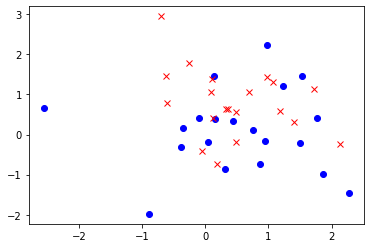

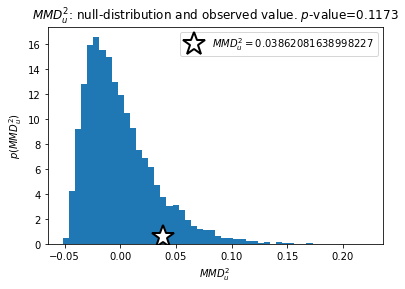

In [14]:
from __future__ import division
import numpy as np
from sys import stdout
from sklearn.metrics import pairwise_kernels


def MMD2u(K, m, n):
    """The MMD^2_u unbiased statistic.
    """
    Kx = K[:m, :m]
    Ky = K[m:, m:]
    Kxy = K[:m, m:]
    return 1.0 / (m * (m - 1.0)) * (Kx.sum() - Kx.diagonal().sum()) + \
        1.0 / (n * (n - 1.0)) * (Ky.sum() - Ky.diagonal().sum()) - \
        2.0 / (m * n) * Kxy.sum()


def compute_null_distribution(K, m, n, iterations=10000, verbose=False,
                              random_state=None, marker_interval=1000):
    """Compute the bootstrap null-distribution of MMD2u.
    """
    if type(random_state) == type(np.random.RandomState()):
        rng = random_state
    else:
        rng = np.random.RandomState(random_state)

    mmd2u_null = np.zeros(iterations)
    for i in range(iterations):
        if verbose and (i % marker_interval) == 0:
            print(i),
            stdout.flush()
        idx = rng.permutation(m+n)
        K_i = K[idx, idx[:, None]]
        mmd2u_null[i] = MMD2u(K_i, m, n)

    if verbose:
        print("")

    return mmd2u_null


def compute_null_distribution_given_permutations(K, m, n, permutation,
                                                 iterations=None):
    """Compute the bootstrap null-distribution of MMD2u given
    predefined permutations.
    Note:: verbosity is removed to improve speed.
    """
    if iterations is None:
        iterations = len(permutation)

    mmd2u_null = np.zeros(iterations)
    for i in range(iterations):
        idx = permutation[i]
        K_i = K[idx, idx[:, None]]
        mmd2u_null[i] = MMD2u(K_i, m, n)

    return mmd2u_null


def kernel_two_sample_test(X, Y, kernel_function='rbf', iterations=10000,
                           verbose=False, random_state=None, **kwargs):
    """Compute MMD^2_u, its null distribution and the p-value of the
    kernel two-sample test.
    Note that extra parameters captured by **kwargs will be passed to
    pairwise_kernels() as kernel parameters. E.g. if
    kernel_two_sample_test(..., kernel_function='rbf', gamma=0.1),
    then this will result in getting the kernel through
    kernel_function(metric='rbf', gamma=0.1).
    """
    m = len(X)
    n = len(Y)
    XY = np.vstack([X, Y])
    K = pairwise_kernels(XY, metric=kernel_function, **kwargs)
    mmd2u = MMD2u(K, m, n)
    if verbose:
        print("MMD^2_u = %s" % mmd2u)
        print("Computing the null distribution.")

   # mmd2u_null = compute_null_distribution(K, m, n, iterations,
   #                                        verbose=verbose,
    #                                       random_state=random_state)
    p_value = max(1.0/iterations, (mmd2u_null > mmd2u).sum() /
                  float(iterations))
    if verbose:
        print("p-value ~= %s \t (resolution : %s)" % (p_value, 1.0/iterations))

    return mmd2u, mmd2u_null, p_value


if __name__ == '__main__':

    import matplotlib.pyplot as plt
    from sklearn.metrics import pairwise_distances

    np.random.seed(0)

    m = 20
    n = 20
    d = 2

    sigma2X = np.eye(d)
    muX = np.zeros(d)

    sigma2Y = np.eye(d)
    muY = np.ones(d)
    # muY = np.zeros(d)

    iterations = 10000

    X = np.random.multivariate_normal(mean=muX, cov=sigma2X, size=m)
    Y = np.random.multivariate_normal(mean=muY, cov=sigma2Y, size=n)

    if d == 2:
        plt.figure()
        plt.plot(X[:, 0], X[:, 1], 'bo')
        plt.plot(Y[:, 0], Y[:, 1], 'rx')

    sigma2 = np.median(pairwise_distances(X, Y, metric='euclidean'))**2
    mmd2u,mmd2u_null, p_value = kernel_two_sample_test(X, Y,
                                                kernel_function='rbf',
                                                gamma=1.0/sigma2,
                                                verbose=True)
    # mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
    #                                                     kernel_function='linear',
    #                                                     verbose=True)

    plt.figure()
    prob, bins, patches = plt.hist(mmd2u_null, bins=50, density=True)
    plt.plot(mmd2u, prob.max()/30, 'w*', markersize=24, markeredgecolor='k',
             markeredgewidth=2, label="$MMD^2_u = %s$" % mmd2u)
    plt.xlabel('$MMD^2_u$')
    plt.ylabel('$p(MMD^2_u)$')
    plt.legend(numpoints=1)
    plt.title('$MMD^2_u$: null-distribution and observed value. $p$-value=%s'
              % p_value)

Banqiao
MMD^2_u = 0.0033403293912628307
Computing the null distribution.
p-value ~= 0.3716 	 (resolution : 0.0001)
MMD^2_u = 0.015312744895082386
Computing the null distribution.
p-value ~= 0.2557 	 (resolution : 0.0001)
MMD^2_u = 0.03311113612746053
Computing the null distribution.
p-value ~= 0.1405 	 (resolution : 0.0001)
MMD^2_u = 0.022126021298768728
Computing the null distribution.
p-value ~= 0.2076 	 (resolution : 0.0001)
---------------------------------------------------------------
MMD^2_u = 0.01714332045841116
Computing the null distribution.
p-value ~= 0.2421 	 (resolution : 0.0001)
MMD^2_u = 0.027730005308807537
Computing the null distribution.
p-value ~= 0.1699 	 (resolution : 0.0001)
MMD^2_u = 0.013916298562151819
Computing the null distribution.
p-value ~= 0.2678 	 (resolution : 0.0001)
MMD^2_u = 0.005444265412667182
Computing the null distribution.
p-value ~= 0.3502 	 (resolution : 0.0001)
MMD^2_u = 0.0060374328791737986
Computing the null distribution.
p-value ~= 0.345

C:\Users\Khalid\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


p-value ~= 0.0006 	 (resolution : 0.0001)
MMD^2_u = 0.11398502375692177
Computing the null distribution.
p-value ~= 0.0071 	 (resolution : 0.0001)
MMD^2_u = 0.1223165320091697
Computing the null distribution.
p-value ~= 0.0046 	 (resolution : 0.0001)
MMD^2_u = 0.13077738645576675
Computing the null distribution.
p-value ~= 0.0038 	 (resolution : 0.0001)
---------------------------------------------------------------
MMD^2_u = 0.03848525216525789
Computing the null distribution.
p-value ~= 0.118 	 (resolution : 0.0001)
MMD^2_u = 0.019611109421364237
Computing the null distribution.
p-value ~= 0.2244 	 (resolution : 0.0001)
MMD^2_u = 0.03406541235077398
Computing the null distribution.
p-value ~= 0.1356 	 (resolution : 0.0001)
MMD^2_u = 0.0024999745843241605
Computing the null distribution.
p-value ~= 0.3833 	 (resolution : 0.0001)
MMD^2_u = 0.0008375670723395068
Computing the null distribution.
p-value ~= 0.4005 	 (resolution : 0.0001)
MMD^2_u = 0.002393194340727378
Computing the null d

C:\Users\Khalid\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


p-value ~= 0.4035 	 (resolution : 0.0001)
MMD^2_u = 0.00024370564475140188
Computing the null distribution.
p-value ~= 0.4063 	 (resolution : 0.0001)
MMD^2_u = 0.011771062087353457
Computing the null distribution.
p-value ~= 0.2854 	 (resolution : 0.0001)
MMD^2_u = 0.00707225519733401
Computing the null distribution.
p-value ~= 0.3332 	 (resolution : 0.0001)
---------------------------------------------------------------
MMD^2_u = 5.4158956336980424e-05
Computing the null distribution.
p-value ~= 0.409 	 (resolution : 0.0001)
MMD^2_u = 0.01570615203417991
Computing the null distribution.
p-value ~= 0.253 	 (resolution : 0.0001)
MMD^2_u = 0.012548463860559855
Computing the null distribution.
p-value ~= 0.2794 	 (resolution : 0.0001)
MMD^2_u = 0.019475954525061567
Computing the null distribution.
p-value ~= 0.2254 	 (resolution : 0.0001)
MMD^2_u = 0.0076097462184889775
Computing the null distribution.
p-value ~= 0.3278 	 (resolution : 0.0001)
MMD^2_u = 0.03064831707399951
Computing the n

C:\Users\Khalid\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


p-value ~= 0.2391 	 (resolution : 0.0001)
MMD^2_u = 0.013342062211871286
Computing the null distribution.
p-value ~= 0.2732 	 (resolution : 0.0001)
MMD^2_u = 0.010421856355249282
Computing the null distribution.
p-value ~= 0.2971 	 (resolution : 0.0001)
MMD^2_u = 0.06366263448535092
Computing the null distribution.
p-value ~= 0.0469 	 (resolution : 0.0001)
---------------------------------------------------------------
MMD^2_u = 0.011548341613427549
Computing the null distribution.
p-value ~= 0.2875 	 (resolution : 0.0001)
MMD^2_u = 0.015835130694275
Computing the null distribution.
p-value ~= 0.252 	 (resolution : 0.0001)
MMD^2_u = 0.04379506839307967
Computing the null distribution.
p-value ~= 0.0984 	 (resolution : 0.0001)
MMD^2_u = 0.00013750287716551846
Computing the null distribution.
p-value ~= 0.4079 	 (resolution : 0.0001)
MMD^2_u = 0.018418513392764346
Computing the null distribution.
p-value ~= 0.2325 	 (resolution : 0.0001)
MMD^2_u = 0.022743723506869484
Computing the null 

C:\Users\Khalid\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


MMD^2_u = 0.04404627554723084
Computing the null distribution.
p-value ~= 0.0978 	 (resolution : 0.0001)
MMD^2_u = 0.04839929943783783
Computing the null distribution.
p-value ~= 0.0851 	 (resolution : 0.0001)
MMD^2_u = 0.04402410048957395
Computing the null distribution.
p-value ~= 0.0979 	 (resolution : 0.0001)
MMD^2_u = 0.09430807095897831
Computing the null distribution.
p-value ~= 0.0153 	 (resolution : 0.0001)
---------------------------------------------------------------
MMD^2_u = 0.004738711286786934
Computing the null distribution.
p-value ~= 0.3565 	 (resolution : 0.0001)
MMD^2_u = 0.001271492190179857
Computing the null distribution.
p-value ~= 0.3952 	 (resolution : 0.0001)
MMD^2_u = 0.016052125632124437
Computing the null distribution.
p-value ~= 0.2498 	 (resolution : 0.0001)
MMD^2_u = 0.00012018324330420604
Computing the null distribution.
p-value ~= 0.4083 	 (resolution : 0.0001)
MMD^2_u = 0.020372654758701758
Computing the null distribution.
p-value ~= 0.2199 	 (resol

C:\Users\Khalid\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


MMD^2_u = 0.056405013536323545
Computing the null distribution.
p-value ~= 0.0607 	 (resolution : 0.0001)
MMD^2_u = 0.0929729257355777
Computing the null distribution.
p-value ~= 0.0157 	 (resolution : 0.0001)
MMD^2_u = 0.13153805948673425
Computing the null distribution.
p-value ~= 0.0037 	 (resolution : 0.0001)
---------------------------------------------------------------
MMD^2_u = 0.010014556787288242
Computing the null distribution.
p-value ~= 0.3013 	 (resolution : 0.0001)
MMD^2_u = 0.0015661663424076933
Computing the null distribution.
p-value ~= 0.3921 	 (resolution : 0.0001)
MMD^2_u = 0.007165448421839304
Computing the null distribution.
p-value ~= 0.3316 	 (resolution : 0.0001)
MMD^2_u = 0.004803780398529911
Computing the null distribution.
p-value ~= 0.3559 	 (resolution : 0.0001)
MMD^2_u = 0.015396320868388935
Computing the null distribution.
p-value ~= 0.2551 	 (resolution : 0.0001)
MMD^2_u = 0.003113250339953355
Computing the null distribution.
p-value ~= 0.3742 	 (resol

C:\Users\Khalid\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Shilin
MMD^2_u = 0.005646681574068335
Computing the null distribution.
p-value ~= 0.3481 	 (resolution : 0.0001)
MMD^2_u = 0.015424934264222312
Computing the null distribution.
p-value ~= 0.2548 	 (resolution : 0.0001)
MMD^2_u = 0.028176696851481053
Computing the null distribution.
p-value ~= 0.1677 	 (resolution : 0.0001)
MMD^2_u = 0.020791352960724208
Computing the null distribution.
p-value ~= 0.2168 	 (resolution : 0.0001)
---------------------------------------------------------------
MMD^2_u = 0.0020253938722176734
Computing the null distribution.
p-value ~= 0.3876 	 (resolution : 0.0001)
MMD^2_u = 0.007751798808398935
Computing the null distribution.
p-value ~= 0.3261 	 (resolution : 0.0001)
MMD^2_u = 0.005974412617645752
Computing the null distribution.
p-value ~= 0.3457 	 (resolution : 0.0001)
MMD^2_u = 0.0016921310649661292
Computing the null distribution.
p-value ~= 0.3904 	 (resolution : 0.0001)
MMD^2_u = 0.0023052427469817394
Computing the null distribution.
p-value ~= 0.3

C:\Users\Khalid\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


MMD^2_u = 0.006442677190456991
Computing the null distribution.
p-value ~= 0.3397 	 (resolution : 0.0001)
MMD^2_u = 0.0194069151741052
Computing the null distribution.
p-value ~= 0.2257 	 (resolution : 0.0001)
MMD^2_u = 0.013307412214115466
Computing the null distribution.
p-value ~= 0.2735 	 (resolution : 0.0001)
MMD^2_u = 0.03294137243765716
Computing the null distribution.
p-value ~= 0.141 	 (resolution : 0.0001)
---------------------------------------------------------------
MMD^2_u = 0.002489554645109804
Computing the null distribution.
p-value ~= 0.3833 	 (resolution : 0.0001)
MMD^2_u = 0.0015562363263091905
Computing the null distribution.
p-value ~= 0.3921 	 (resolution : 0.0001)
MMD^2_u = 0.009838197620529843
Computing the null distribution.
p-value ~= 0.303 	 (resolution : 0.0001)
MMD^2_u = 0.0014051900134335327
Computing the null distribution.
p-value ~= 0.3933 	 (resolution : 0.0001)
MMD^2_u = 0.0026383513994040486
Computing the null distribution.
p-value ~= 0.3804 	 (resol

C:\Users\Khalid\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


MMD^2_u = 0.08778193243701182
Computing the null distribution.
p-value ~= 0.0187 	 (resolution : 0.0001)
MMD^2_u = 0.0032934278219519664
Computing the null distribution.
p-value ~= 0.3726 	 (resolution : 0.0001)
MMD^2_u = 0.06057495050063921
Computing the null distribution.
p-value ~= 0.0522 	 (resolution : 0.0001)
MMD^2_u = 0.050586704682969774
Computing the null distribution.
p-value ~= 0.0787 	 (resolution : 0.0001)
---------------------------------------------------------------
MMD^2_u = 0.0750917184430957
Computing the null distribution.
p-value ~= 0.0315 	 (resolution : 0.0001)
MMD^2_u = 0.0039940053994856894
Computing the null distribution.
p-value ~= 0.3649 	 (resolution : 0.0001)
MMD^2_u = 0.03663105056961047
Computing the null distribution.
p-value ~= 0.1251 	 (resolution : 0.0001)
MMD^2_u = 0.04613782234741681
Computing the null distribution.
p-value ~= 0.0917 	 (resolution : 0.0001)
MMD^2_u = 0.028686446206796168
Computing the null distribution.
p-value ~= 0.1644 	 (resolut

C:\Users\Khalid\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


MMD^2_u = 0.001372778237611949
Computing the null distribution.
p-value ~= 0.3938 	 (resolution : 0.0001)
MMD^2_u = 0.08231474777447523
Computing the null distribution.
p-value ~= 0.0227 	 (resolution : 0.0001)
MMD^2_u = 0.05769832803202579
Computing the null distribution.
p-value ~= 0.0581 	 (resolution : 0.0001)
MMD^2_u = 0.044546589133324876
Computing the null distribution.
p-value ~= 0.0962 	 (resolution : 0.0001)
---------------------------------------------------------------
MMD^2_u = 0.08576366092054455
Computing the null distribution.
p-value ~= 0.0198 	 (resolution : 0.0001)
MMD^2_u = 0.05659753111569521
Computing the null distribution.
p-value ~= 0.0602 	 (resolution : 0.0001)
MMD^2_u = 0.04031126868454049
Computing the null distribution.
p-value ~= 0.1105 	 (resolution : 0.0001)
MMD^2_u = 0.005284464185857374
Computing the null distribution.
p-value ~= 0.3514 	 (resolution : 0.0001)
MMD^2_u = 0.013882734082237835
Computing the null distribution.
p-value ~= 0.2683 	 (resoluti

C:\Users\Khalid\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
<ipython-input-12-07ddbd9df686>:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


MMD^2_u = 0.014443784385165026
Computing the null distribution.
p-value ~= 0.2629 	 (resolution : 0.0001)
MMD^2_u = 0.030210237773795612
Computing the null distribution.
p-value ~= 0.1543 	 (resolution : 0.0001)
MMD^2_u = 0.04198322830123158
Computing the null distribution.
p-value ~= 0.1046 	 (resolution : 0.0001)
---------------------------------------------------------------
MMD^2_u = 0.0003786402811115641
Computing the null distribution.
p-value ~= 0.4053 	 (resolution : 0.0001)
MMD^2_u = 0.005049140920144413
Computing the null distribution.
p-value ~= 0.3536 	 (resolution : 0.0001)
MMD^2_u = 0.010778264234763912
Computing the null distribution.
p-value ~= 0.294 	 (resolution : 0.0001)
MMD^2_u = 0.002689424082966352
Computing the null distribution.
p-value ~= 0.3801 	 (resolution : 0.0001)
MMD^2_u = 0.006871186644160532
Computing the null distribution.
p-value ~= 0.3363 	 (resolution : 0.0001)
MMD^2_u = 0.0006272479041873336
Computing the null distribution.
p-value ~= 0.4022 	 (res

C:\Users\Khalid\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


MMD^2_u = 0.0030109274038259137
Computing the null distribution.
p-value ~= 0.3761 	 (resolution : 0.0001)
MMD^2_u = 0.03250311768694958
Computing the null distribution.
p-value ~= 0.144 	 (resolution : 0.0001)
---------------------------------------------------------------
MMD^2_u = 0.03762861016118502
Computing the null distribution.
p-value ~= 0.1218 	 (resolution : 0.0001)
MMD^2_u = 0.0033108132774012367
Computing the null distribution.
p-value ~= 0.372 	 (resolution : 0.0001)
MMD^2_u = 0.028497027999105806
Computing the null distribution.
p-value ~= 0.1657 	 (resolution : 0.0001)
MMD^2_u = 0.05338718801336062
Computing the null distribution.
p-value ~= 0.07 	 (resolution : 0.0001)
MMD^2_u = 0.025575796240741355
Computing the null distribution.
p-value ~= 0.1847 	 (resolution : 0.0001)
MMD^2_u = 0.02540527798690073
Computing the null distribution.
p-value ~= 0.1858 	 (resolution : 0.0001)
[-0.00014483  0.04050922  0.00301093  0.03250312  0.03762861  0.00331081
  0.02849703  0.05338

C:\Users\Khalid\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


MMD^2_u = 0.0036313387035596945
Computing the null distribution.
p-value ~= 0.3684 	 (resolution : 0.0001)
MMD^2_u = 0.005902436494433894
Computing the null distribution.
p-value ~= 0.3462 	 (resolution : 0.0001)
MMD^2_u = 0.0012919946806848603
Computing the null distribution.
p-value ~= 0.3952 	 (resolution : 0.0001)
MMD^2_u = 0.014310670447711726
Computing the null distribution.
p-value ~= 0.2637 	 (resolution : 0.0001)
---------------------------------------------------------------
MMD^2_u = 0.010782721773680337
Computing the null distribution.
p-value ~= 0.294 	 (resolution : 0.0001)
MMD^2_u = 0.008346974561581733
Computing the null distribution.
p-value ~= 0.3199 	 (resolution : 0.0001)
MMD^2_u = 0.026370666912167495
Computing the null distribution.
p-value ~= 0.1777 	 (resolution : 0.0001)
MMD^2_u = 0.001548150360600964
Computing the null distribution.
p-value ~= 0.3921 	 (resolution : 0.0001)
MMD^2_u = 0.0043974277073338675
Computing the null distribution.
p-value ~= 0.3606 	 (r

C:\Users\Khalid\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


p-value ~= 0.1375 	 (resolution : 0.0001)
MMD^2_u = 0.1137553422939499
Computing the null distribution.
p-value ~= 0.0071 	 (resolution : 0.0001)
MMD^2_u = 0.08276122032451849
Computing the null distribution.
p-value ~= 0.0222 	 (resolution : 0.0001)
---------------------------------------------------------------
MMD^2_u = 0.007124103325652831
Computing the null distribution.
p-value ~= 0.3325 	 (resolution : 0.0001)
MMD^2_u = 0.05541864444620448
Computing the null distribution.
p-value ~= 0.0635 	 (resolution : 0.0001)
MMD^2_u = 0.03745572887959614
Computing the null distribution.
p-value ~= 0.1223 	 (resolution : 0.0001)
MMD^2_u = 0.02307294437371199
Computing the null distribution.
p-value ~= 0.2014 	 (resolution : 0.0001)
MMD^2_u = 0.01221681604358138
Computing the null distribution.
p-value ~= 0.2817 	 (resolution : 0.0001)
MMD^2_u = 0.008919160482079747
Computing the null distribution.
p-value ~= 0.313 	 (resolution : 0.0001)
[0.01139701 0.03367499 0.11375534 0.08276122 0.0071241

C:\Users\Khalid\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Xizhi
MMD^2_u = 0.009255007230307477
Computing the null distribution.
p-value ~= 0.3089 	 (resolution : 0.0001)
MMD^2_u = 0.037397547773073025
Computing the null distribution.
p-value ~= 0.1223 	 (resolution : 0.0001)
MMD^2_u = 0.009344472563278083
Computing the null distribution.
p-value ~= 0.3085 	 (resolution : 0.0001)
MMD^2_u = 0.06710093761799718
Computing the null distribution.
p-value ~= 0.0415 	 (resolution : 0.0001)
---------------------------------------------------------------
MMD^2_u = 0.010793210056653235
Computing the null distribution.
p-value ~= 0.294 	 (resolution : 0.0001)
MMD^2_u = 0.0007072307007517376
Computing the null distribution.
p-value ~= 0.4012 	 (resolution : 0.0001)
MMD^2_u = 0.03608749544715961
Computing the null distribution.
p-value ~= 0.127 	 (resolution : 0.0001)
MMD^2_u = 0.019379949834848698
Computing the null distribution.
p-value ~= 0.2259 	 (resolution : 0.0001)
MMD^2_u = 0.009450620238258156
Computing the null distribution.
p-value ~= 0.3072 	 (

C:\Users\Khalid\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


MMD^2_u = 0.002297784446857798
Computing the null distribution.
p-value ~= 0.3852 	 (resolution : 0.0001)
MMD^2_u = 0.018677409112096366
Computing the null distribution.
p-value ~= 0.2308 	 (resolution : 0.0001)
MMD^2_u = 0.015524535596789457
Computing the null distribution.
p-value ~= 0.2542 	 (resolution : 0.0001)
MMD^2_u = 0.02799022549371366
Computing the null distribution.
p-value ~= 0.1687 	 (resolution : 0.0001)
---------------------------------------------------------------
MMD^2_u = 0.007404024656122887
Computing the null distribution.
p-value ~= 0.3293 	 (resolution : 0.0001)
MMD^2_u = 0.005468534505101097
Computing the null distribution.
p-value ~= 0.35 	 (resolution : 0.0001)
MMD^2_u = 0.012829911696646934
Computing the null distribution.
p-value ~= 0.2767 	 (resolution : 0.0001)
MMD^2_u = -0.00047665263819174353
Computing the null distribution.
p-value ~= 0.4161 	 (resolution : 0.0001)
MMD^2_u = 0.002181704567007725
Computing the null distribution.
p-value ~= 0.386 	 (reso

C:\Users\Khalid\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


MMD^2_u = 0.05021244355704935
Computing the null distribution.
p-value ~= 0.0799 	 (resolution : 0.0001)
MMD^2_u = 0.017699456794108892
Computing the null distribution.
p-value ~= 0.2382 	 (resolution : 0.0001)
MMD^2_u = 0.04954444982273509
Computing the null distribution.
p-value ~= 0.081 	 (resolution : 0.0001)
---------------------------------------------------------------
MMD^2_u = 0.010085940277949512
Computing the null distribution.
p-value ~= 0.3009 	 (resolution : 0.0001)
MMD^2_u = 0.0005454524421224516
Computing the null distribution.
p-value ~= 0.4033 	 (resolution : 0.0001)
MMD^2_u = 0.013751233270806185
Computing the null distribution.
p-value ~= 0.2692 	 (resolution : 0.0001)
MMD^2_u = 0.008385033795087371
Computing the null distribution.
p-value ~= 0.3193 	 (resolution : 0.0001)
MMD^2_u = 0.0036687161945534452
Computing the null distribution.
p-value ~= 0.368 	 (resolution : 0.0001)
MMD^2_u = 0.008213672411905737
Computing the null distribution.
p-value ~= 0.321 	 (resolu

C:\Users\Khalid\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


p-value ~= 0.1733 	 (resolution : 0.0001)
MMD^2_u = 0.029467345549648916
Computing the null distribution.
p-value ~= 0.1587 	 (resolution : 0.0001)
MMD^2_u = 0.030890087998942883
Computing the null distribution.
p-value ~= 0.1519 	 (resolution : 0.0001)
---------------------------------------------------------------
MMD^2_u = 0.0023703603604987578
Computing the null distribution.
p-value ~= 0.3847 	 (resolution : 0.0001)
MMD^2_u = 0.009828106697747807
Computing the null distribution.
p-value ~= 0.3034 	 (resolution : 0.0001)
MMD^2_u = 0.011417192275977817
Computing the null distribution.
p-value ~= 0.2887 	 (resolution : 0.0001)
MMD^2_u = 0.004250381400423442
Computing the null distribution.
p-value ~= 0.3623 	 (resolution : 0.0001)
MMD^2_u = 0.005632649183813454
Computing the null distribution.
p-value ~= 0.3483 	 (resolution : 0.0001)
MMD^2_u = 7.44010379997162e-05
Computing the null distribution.
p-value ~= 0.4089 	 (resolution : 0.0001)
[1.27144356e-02 2.72053457e-02 2.94673455e-02

C:\Users\Khalid\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


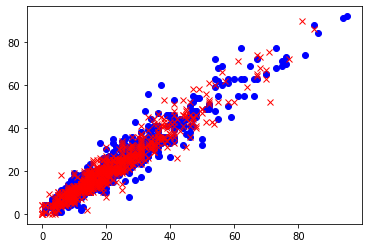

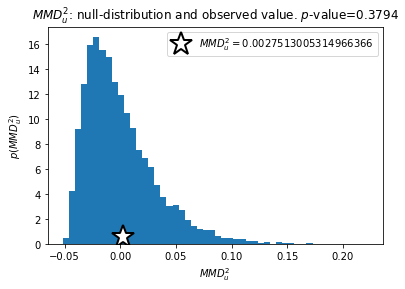

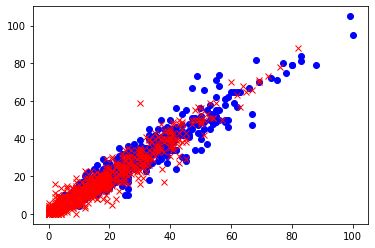

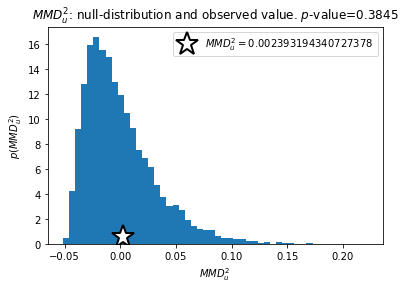

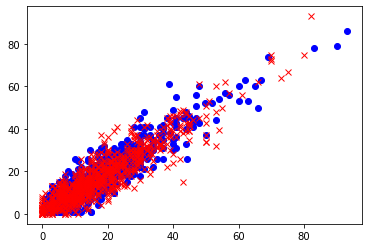

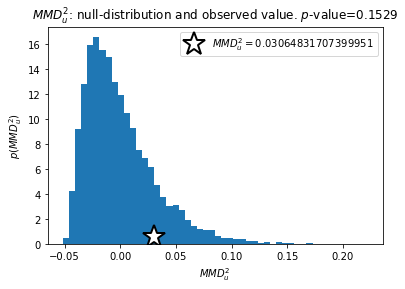

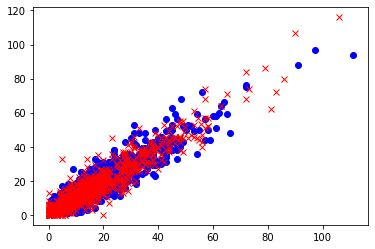

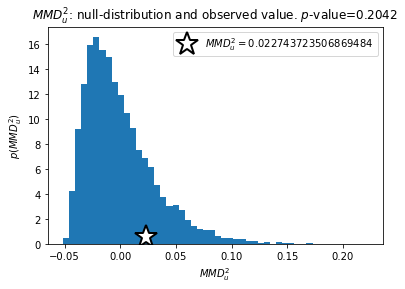

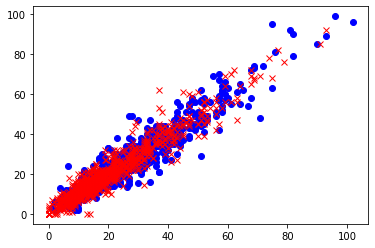

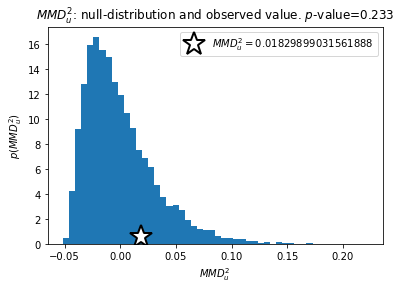

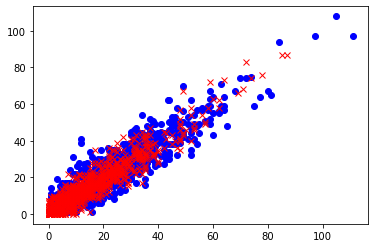

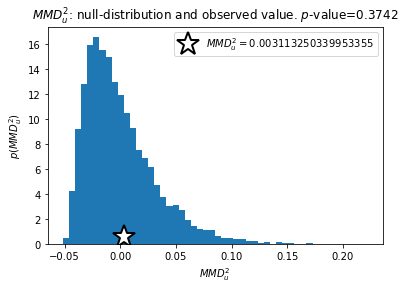

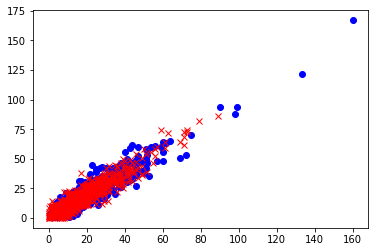

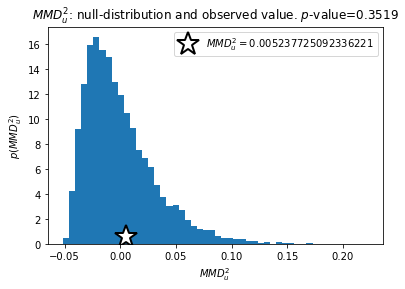

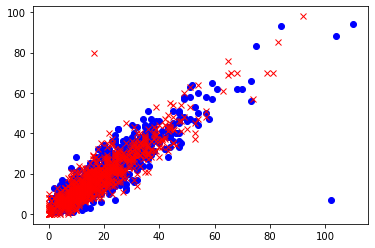

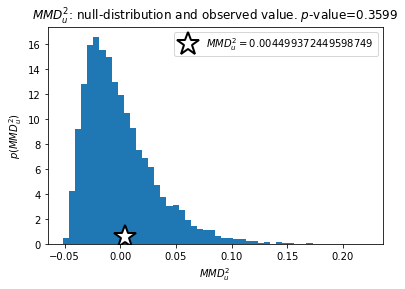

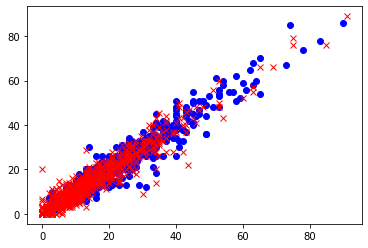

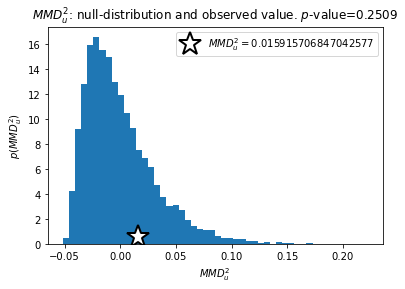

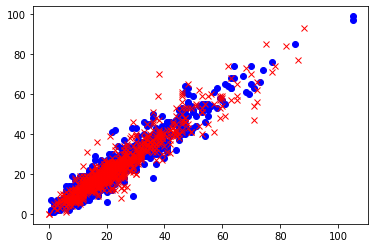

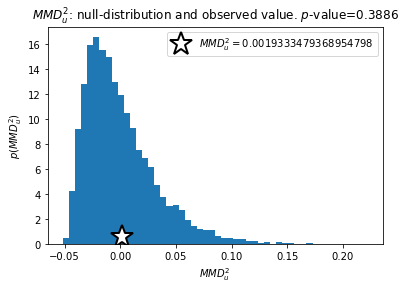

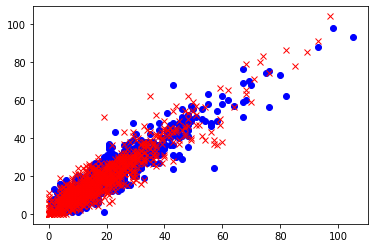

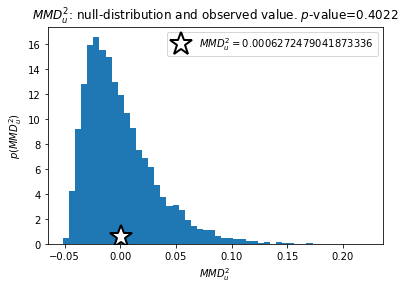

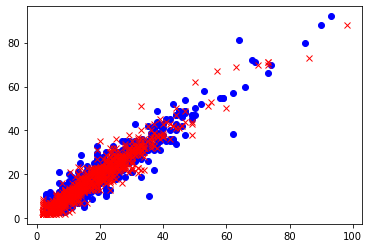

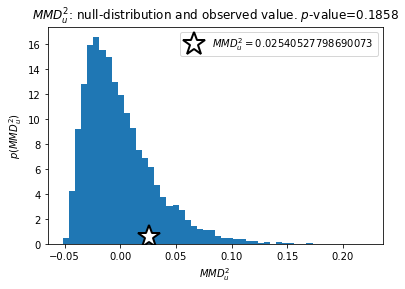

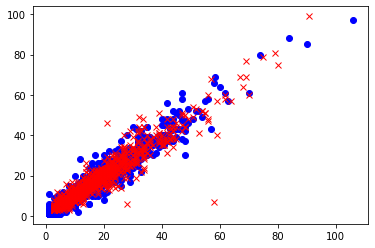

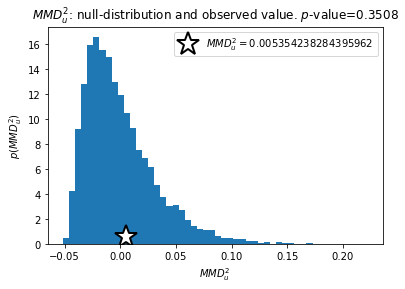

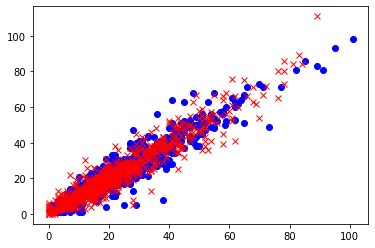

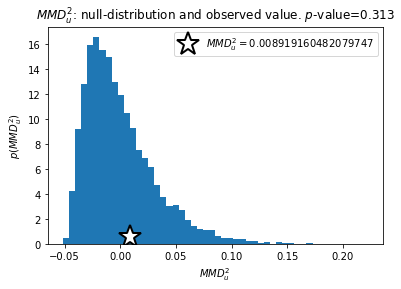

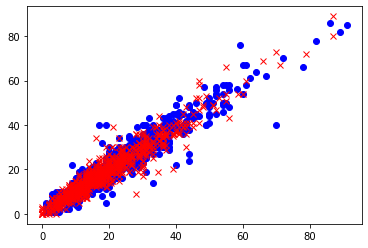

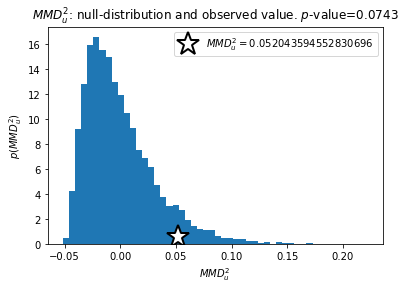

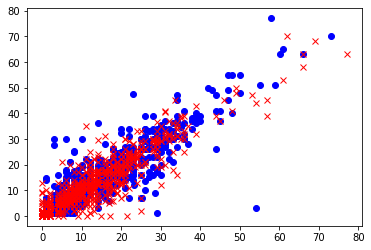

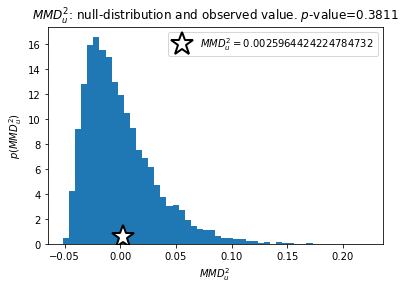

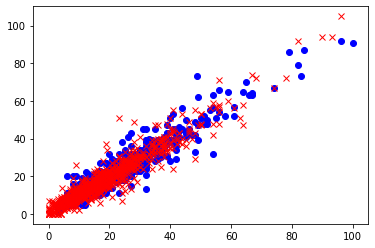

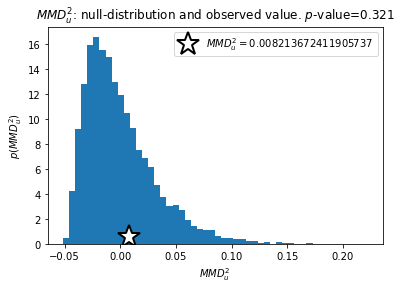

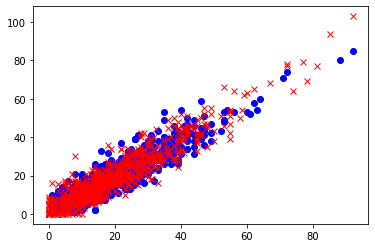

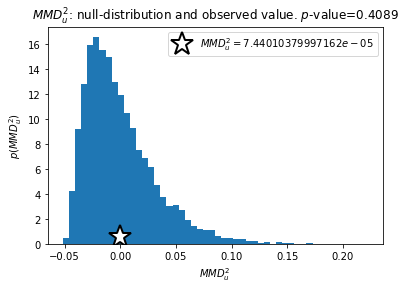

In [12]:
from __future__ import division
import numpy as np
from scipy import stats

from sys import stdout
from sklearn.metrics import pairwise_kernels

a=df14['SiteEngName'].unique()
opv=[]
max1=[]
for i in range(18):
    a1=(df4[df14.SiteEngName==a[i]])
    a2=(df5[df15.SiteEngName==a[i]])
    a3=(df6[df16.SiteEngName==a[i]])
    a4=(df7[df17.SiteEngName==a[i]])
    a5=(df8[df18.SiteEngName==a[i]])
    b1=a1.PM
    b2=a2.PM
    b3=a3.PM[:8760]
    b4=a4.PM
    b5=a5.PM
    print('==============')
    print(a[i])
    a45=b1.values.reshape((-1, 10))
    a46=b2.values.reshape((-1, 10))
    #55=b2.values.reshape((-1, 10))
    #56=b3.values.reshape((-1, 10))
    a65=b3.values.reshape((-1, 10))
    a66=b4.values.reshape((-1, 10))
    a75=b5.values.reshape((-1, 10))
    #a76=b6.values.reshape((-1, 10))
    if __name__ == '__main__':

        import matplotlib.pyplot as plt
        from sklearn.metrics import pairwise_distances

        np.random.seed(0)

        m = 20
        n = 20
        d = 2

        sigma2X = np.eye(d)
        muX = np.zeros(d)

        sigma2Y = np.eye(d)
        muY = np.ones(d)
        # muY = np.zeros(d)

        iterations = 10000

        #X = np.random.multivariate_normal(mean=muX, cov=sigma2X, size=m)
        #Y = np.random.multivariate_normal(mean=muY, cov=sigma2Y, size=n)
        X=a45
        Y=a46

        if d == 2:
            plt.figure()
            plt.plot(X[:, 0], X[:, 1], 'bo')
            plt.plot(Y[:, 0], Y[:, 1], 'rx')

        sigma2 = np.median(pairwise_distances(X, Y, metric='euclidean'))**2
        mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
                                                            kernel_function='rbf',
                                                            gamma=1.0/sigma2,
                                                            verbose=True)
        op1=mmd2u
       
        mmd2u, mmd2u_null, p_value = kernel_two_sample_test(a45, a65,
                                                            kernel_function='rbf',
                                                            gamma=1.0/sigma2,
                                                            verbose=True)
        op2=mmd2u
        mmd2u, mmd2u_null, p_value = kernel_two_sample_test(a45, a66,
                                                            kernel_function='rbf',
                                                            gamma=1.0/sigma2,
                                                            verbose=True)
        op3=mmd2u
        mmd2u, mmd2u_null, p_value = kernel_two_sample_test(a45, a75,
                                                            kernel_function='rbf',
                                                            gamma=1.0/sigma2,
                                                            verbose=True)
        op4=mmd2u
        print('---------------------------------------------------------------')
       
    
        
        mmd2u, mmd2u_null, p_value = kernel_two_sample_test(a46, a65,
                                                            kernel_function='rbf',
                                                            gamma=1.0/sigma2,
                                                            verbose=True)
        op5=mmd2u
        mmd2u, mmd2u_null, p_value = kernel_two_sample_test(a46,a66,
                                                            kernel_function='rbf',
                                                            gamma=1.0/sigma2,
                                                            verbose=True)
        op6=mmd2u
        mmd2u, mmd2u_null, p_value = kernel_two_sample_test(a46,a75,
                                                            kernel_function='rbf',
                                                            gamma=1.0/sigma2,
                                                            verbose=True)
        op7=mmd2u
    
        print('=========================================================')
        
        
        print('=========================================================')
        
        
        
        mmd2u, mmd2u_null, p_value = kernel_two_sample_test(a65,a66,
                                                            kernel_function='rbf',
                                                            gamma=1.0/sigma2,
                                                            verbose=True)
        op8=mmd2u
        mmd2u, mmd2u_null, p_value = kernel_two_sample_test(a65,a75,
                                                            kernel_function='rbf',
                                                            gamma=1.0/sigma2,
                                                            verbose=True)
        op9=mmd2u
        mmd2u, mmd2u_null, p_value = kernel_two_sample_test(a66,a75,
                                                            kernel_function='rbf',
                                                            gamma=1.0/sigma2,
                                                            verbose=True)
        op10=mmd2u
        # mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
        #                                                     kernel_function='linear',
        #                                                     verbose=True)
        je=np.array([op1,op2,op3,op4,op5,op6,op7,op8,op9,op10])
        max1.append(je)
        print(je)
        print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(je))
        k2, op=stats.normaltest(je)
        print(op)
        opv.append(op)
        #p=mmd2u
        #pv.append(op)
        plt.figure()
        prob, bins, patches = plt.hist(mmd2u_null, bins=50, density=True)
        plt.plot(mmd2u, prob.max()/30, 'w*', markersize=24, markeredgecolor='k',
                 markeredgewidth=2, label="$MMD^2_u = %s$" % mmd2u)
        plt.xlabel('$MMD^2_u$')
        plt.ylabel('$p(MMD^2_u)$')
        plt.legend(numpoints=1)
        plt.title('$MMD^2_u$: null-distribution and observed value. $p$-value=%s'
                  % p_value)



In [77]:
max1

[array([0.00334033, 0.01531274, 0.03311114, 0.02212602, 0.01714332,
        0.02773001, 0.0139163 , 0.00544427, 0.00603743, 0.0027513 ]),
 array([0.1701188 , 0.11398502, 0.12231653, 0.13077739, 0.03848525,
        0.01961111, 0.03406541, 0.00249997, 0.00083757, 0.00239319]),
 array([5.09580277e-04, 2.43705645e-04, 1.17710621e-02, 7.07225520e-03,
        5.41589563e-05, 1.57061520e-02, 1.25484639e-02, 1.94759545e-02,
        7.60974622e-03, 3.06483171e-02]),
 array([0.01752198, 0.01334206, 0.01042186, 0.06366263, 0.01154834,
        0.01583513, 0.04379507, 0.0001375 , 0.01841851, 0.02274372]),
 array([0.04404628, 0.0483993 , 0.0440241 , 0.09430807, 0.00473871,
        0.00127149, 0.01605213, 0.00012018, 0.02037265, 0.01829899]),
 array([0.0958612 , 0.05640501, 0.09297293, 0.13153806, 0.01001456,
        0.00156617, 0.00716545, 0.00480378, 0.01539632, 0.00311325]),
 array([0.00564668, 0.01542493, 0.0281767 , 0.02079135, 0.00202539,
        0.0077518 , 0.00597441, 0.00169213, 0.00230524, 

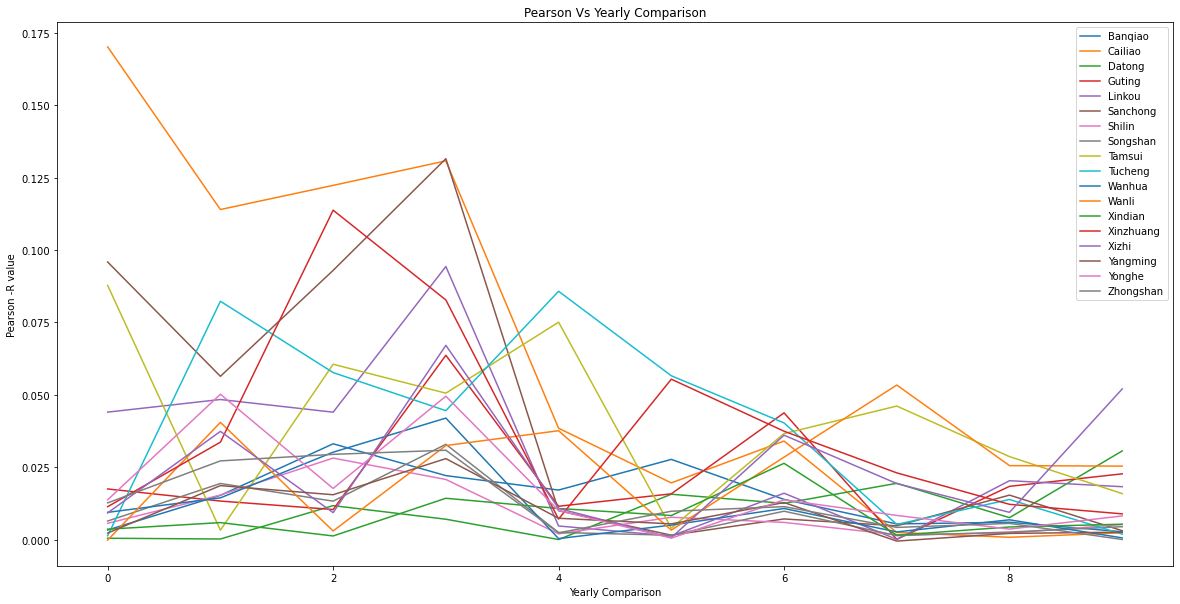

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for i in range(18):
    plt.plot(max1[i],label=a[i])
#plt.plot(rv1[1],label=a[1])
#plt.plot(rv1[2],label=a[1])
plt.xlabel('Yearly Comparison')
plt.ylabel('Pearson -R value')
plt.legend()
plt.title('Pearson Vs Yearly Comparison')
plt.show()

In [79]:
column_values=['Pvalue'] 
dfr = pd.DataFrame(data = max1,  
                  index = a,  
                  columns =['y45', 'y46', 'y47', 'y48','y56','y57','y58','y67','y68','y78']) 

# displaying the dataframe 
#print(dfr) 
y45=dfr.y45
y46=dfr.y46
y47=dfr.y47
y48=dfr.y48
y56=dfr.y56
y57=dfr.y57
y58=dfr.y58
y67=dfr.y67
y68=dfr.y68
y78=dfr.y78



dfz = pd.DataFrame({'y45': y45,
'y46': y46,'y47': y47,'y48': y48,'y56': y56,'y57': y57,'y58': y58,'y58': y58,'y67':y67,'y68':y68,'y78':y78}, index=a)
dfz4 = pd.DataFrame({'y45': y45,
'y46': y46,'y47': y47,'y48': y48},index=a)
dfz5 = pd.DataFrame({'y56': y56,'y57': y57,'y58': y58,'y58': y58},index=a)
dfz6 = pd.DataFrame({'y67':y67,'y68':y68,'y78':y78},index=a)

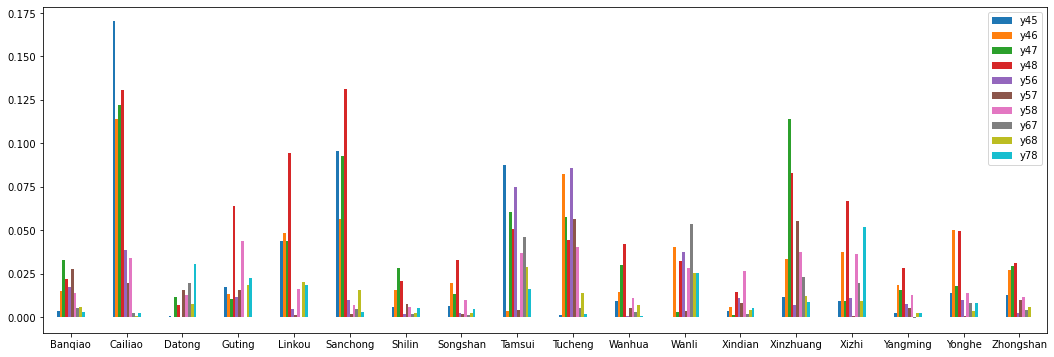

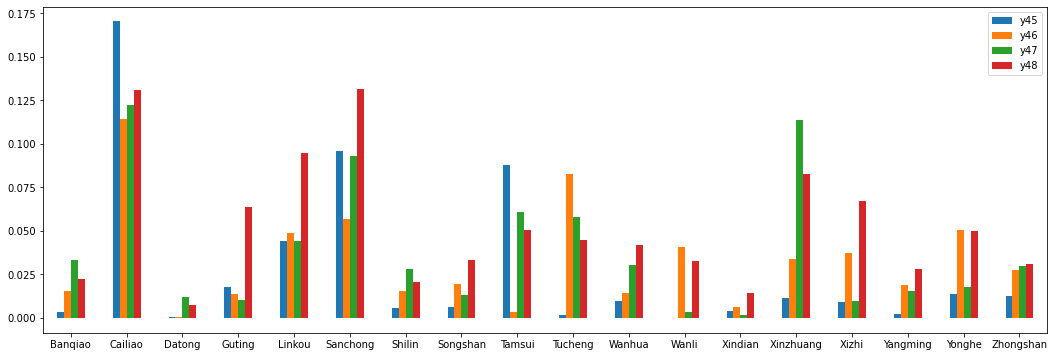

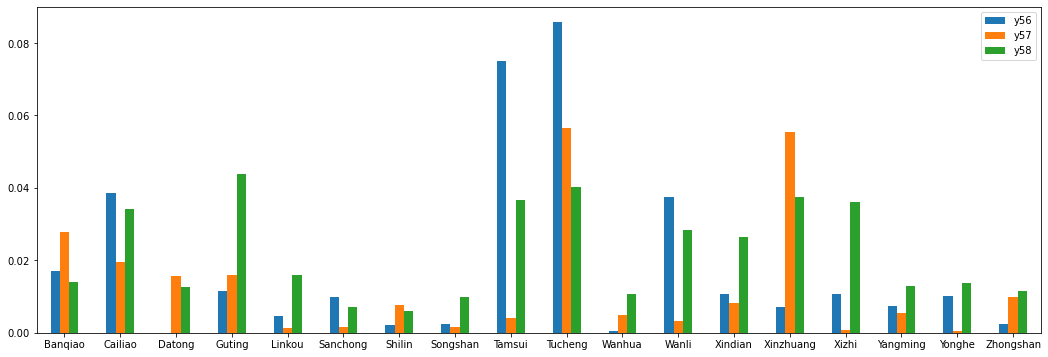

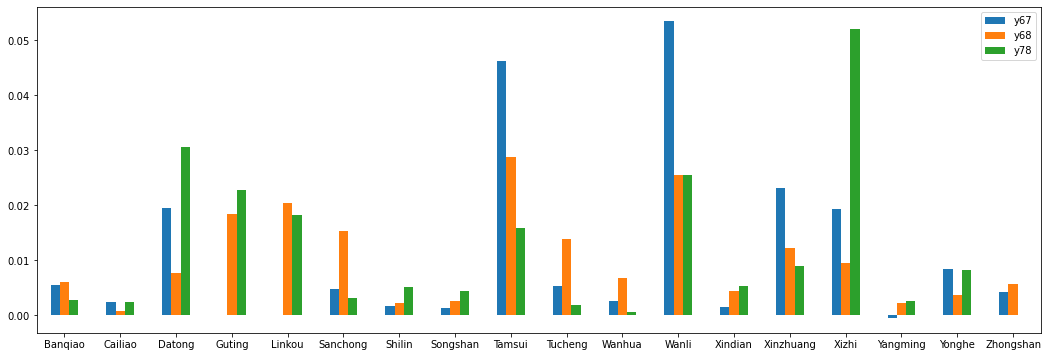

In [83]:
ax1 = dfz.plot.bar(rot=0, figsize=(18, 6))
ax14 = dfz4.plot.bar(rot=0, figsize=(18, 6))
ax15 = dfz5.plot.bar(rot=0, figsize=(18, 6))
ax16 = dfz6.plot.bar(rot=0, figsize=(18, 6))

In [85]:
column_values=['Pvalue'] 
df = pd.DataFrame(data = opv,  
                  index = a,  
                  columns = column_values) 
  
# displaying the dataframe 
print(df) 

             Pvalue
Banqiao    0.619549
Cailiao    0.272662
Datong     0.373206
Guting     0.024606
Linkou     0.082019
Sanchong   0.351633
Shilin     0.144327
Songshan   0.017745
Tamsui     0.757407
Tucheng    0.398046
Wanhua     0.046443
Wanli      0.782326
Xindian    0.006685
Xinzhuang  0.130954
Xizhi      0.429656
Yangming   0.331624
Yonghe     0.089973
Zhongshan  0.343402


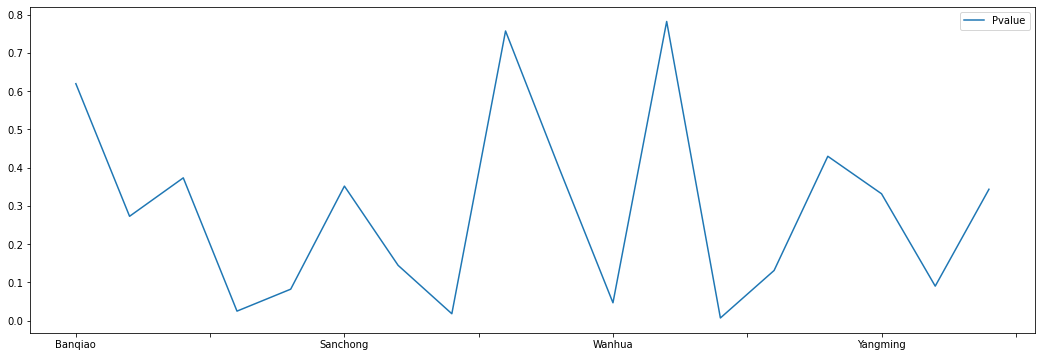

In [87]:
ax11 = df.plot.line(figsize=(18,6))


In [82]:
# displaying the dataframe 
print(df) 
print(df.nlargest(5, ['Pvalue']))
print(df.nsmallest(5, ['Pvalue']) )


             Pvalue
Banqiao    0.619549
Cailiao    0.272662
Datong     0.373206
Guting     0.024606
Linkou     0.082019
Sanchong   0.351633
Shilin     0.144327
Songshan   0.017745
Tamsui     0.757407
Tucheng    0.398046
Wanhua     0.046443
Wanli      0.782326
Xindian    0.006685
Xinzhuang  0.130954
Xizhi      0.429656
Yangming   0.331624
Yonghe     0.089973
Zhongshan  0.343402
           Pvalue
Wanli    0.782326
Tamsui   0.757407
Banqiao  0.619549
Xizhi    0.429656
Tucheng  0.398046
            Pvalue
Xindian   0.006685
Songshan  0.017745
Guting    0.024606
Wanhua    0.046443
Linkou    0.082019


In [29]:
column_values=['MMD'] 
df_mmd = pd.DataFrame(data = opv,  
                  index = a,  
                  columns = column_values) 
  
# displaying the dataframe 
print(df_mmd) 
print(df_mmd.nlargest(5, ['MMD']))
print(df_mmd.nsmallest(5, ['MMD']) )







           MMD
Banqiao    NaN
Cailiao    NaN
Datong     NaN
Guting     NaN
Linkou     NaN
Sanchong   NaN
Shilin     NaN
Songshan   NaN
Tamsui     NaN
Tucheng    NaN
Wanhua     NaN
Wanli      NaN
Xindian    NaN
Xinzhuang  NaN
Xizhi      NaN
Yangming   NaN
Yonghe     NaN
Zhongshan  NaN


TypeError: Column 'MMD' has dtype object, cannot use method 'nlargest' with this dtype

Banqiao
MMD^2_u = 0.005456737342518059
Computing the null distribution.
0


KeyboardInterrupt: 

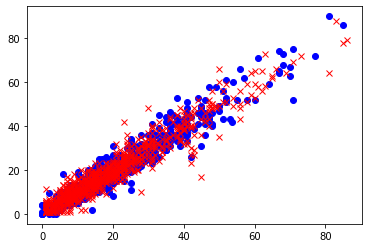

In [51]:
from __future__ import division
import numpy as np
from sys import stdout
from sklearn.metrics import pairwise_kernels

a=df14['SiteEngName'].unique()
opv=[]
for i in range(18):
    a1=(df4[df14.SiteEngName==a[i]])
    a2=(df5[df15.SiteEngName==a[i]])
    a3=(df6[df16.SiteEngName==a[i]])
    a4=(df7[df17.SiteEngName==a[i]])
    a5=(df8[df18.SiteEngName==a[i]])
    b1=a2.PM
    b2=a3.PM[:8760]
   #b3=a3.PM
    #b4=a4.PM
    #b5=a5.PM
    print('==============')
    print(a[i])
    a45=b1.values.reshape((-1, 10))
    a46=b2.values.reshape((-1, 10))
    
    if __name__ == '__main__':

        import matplotlib.pyplot as plt
        from sklearn.metrics import pairwise_distances

        np.random.seed(0)

        m = 20
        n = 20
        d = 2

        sigma2X = np.eye(d)
        muX = np.zeros(d)

        sigma2Y = np.eye(d)
        muY = np.ones(d)
        # muY = np.zeros(d)

        iterations = 10000

        #X = np.random.multivariate_normal(mean=muX, cov=sigma2X, size=m)
        #Y = np.random.multivariate_normal(mean=muY, cov=sigma2Y, size=n)
        X=a45
        Y=a46

        if d == 2:
            plt.figure()
            plt.plot(X[:, 0], X[:, 1], 'bo')
            plt.plot(Y[:, 0], Y[:, 1], 'rx')

        sigma2 = np.median(pairwise_distances(X, Y, metric='euclidean'))**2
        mmd2u, mmd2u_null, p_value = kernel_two_sample_test(a65, a66,
                                                            kernel_function='rbf',
                                                            gamma=1.0/sigma2,
                                                            verbose=True)
        # mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
        #                                                     kernel_function='linear',
        #       verbose=True)
        op=mmd2u
        opv.append(op)
        plt.figure()
        prob, bins, patches = plt.hist(mmd2u_null, bins=50, density=True)
        plt.plot(mmd2u, prob.max()/30, 'w*', markersize=24, markeredgecolor='k',
                 markeredgewidth=2, label="$MMD^2_u = %s$" % mmd2u)
        plt.xlabel('$MMD^2_u$')
        plt.ylabel('$p(MMD^2_u)$')
        plt.legend(numpoints=1)
        plt.title('$MMD^2_u$: null-distribution and observed value. $p$-value=%s'
                  % p_value)



In [31]:
column_values=['MMD'] 
df_mmd = pd.DataFrame(data = opv,  
                  index = a,  
                  columns = column_values) 
  
# displaying the dataframe 
print(df_mmd) 
print(df_mmd.nlargest(5, ['MMD']))
print(df_mmd.nsmallest(5, ['MMD']) )

           MMD
Banqiao    NaN
Cailiao    NaN
Datong     NaN
Guting     NaN
Linkou     NaN
Sanchong   NaN
Shilin     NaN
Songshan   NaN
Tamsui     NaN
Tucheng    NaN
Wanhua     NaN
Wanli      NaN
Xindian    NaN
Xinzhuang  NaN
Xizhi      NaN
Yangming   NaN
Yonghe     NaN
Zhongshan  NaN


TypeError: Column 'MMD' has dtype object, cannot use method 'nlargest' with this dtype

Banqiao
MMD^2_u = 0.005502503889324939
Computing the null distribution.
0


KeyboardInterrupt: 

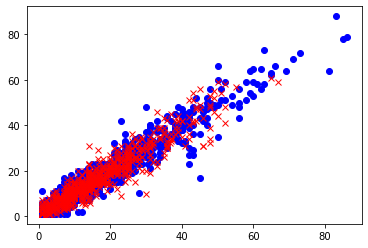

In [52]:
from __future__ import division
import numpy as np
from sys import stdout
from sklearn.metrics import pairwise_kernels

a=df14['SiteEngName'].unique()
opv=[]
for i in range(18):
    a1=(df4[df14.SiteEngName==a[i]])
    a2=(df5[df15.SiteEngName==a[i]])
    a3=(df6[df16.SiteEngName==a[i]])
    a4=(df7[df17.SiteEngName==a[i]])
    a5=(df8[df18.SiteEngName==a[i]])
    b2=a4.PM
    b1=a3.PM[:8760]
   #b3=a3.PM
    #b4=a4.PM
    #b5=a5.PM
    print('==============')
    print(a[i])
    a45=b1.values.reshape((-1, 10))
    a46=b2.values.reshape((-1, 10))
    
    if __name__ == '__main__':

        import matplotlib.pyplot as plt
        from sklearn.metrics import pairwise_distances

        np.random.seed(0)

        m = 20
        n = 20
        d = 2

        sigma2X = np.eye(d)
        muX = np.zeros(d)

        sigma2Y = np.eye(d)
        muY = np.ones(d)
        # muY = np.zeros(d)

        iterations = 10000

        #X = np.random.multivariate_normal(mean=muX, cov=sigma2X, size=m)
        #Y = np.random.multivariate_normal(mean=muY, cov=sigma2Y, size=n)
        X=a45
        Y=a46

        if d == 2:
            plt.figure()
            plt.plot(X[:, 0], X[:, 1], 'bo')
            plt.plot(Y[:, 0], Y[:, 1], 'rx')

        sigma2 = np.median(pairwise_distances(X, Y, metric='euclidean'))**2
        mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
                                                            kernel_function='rbf',
                                                            gamma=1.0/sigma2,
                                                            verbose=True)
        # mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
        #                                                     kernel_function='linear',
        #                                                     verbose=True)
        op=mmd2u
        opv.append(op)
        ##prob, bins, patches = plt.hist(mmd2u_null, bins=50, density=True)
        plt.plot(mmd2u, prob.max()/30, 'w*', markersize=24, markeredgecolor='k',
                 markeredgewidth=2, label="$MMD^2_u = %s$" % mmd2u)
        plt.xlabel('$MMD^2_u$')
        plt.ylabel('$p(MMD^2_u)$')
        plt.legend(numpoints=1)
        plt.title('$MMD^2_u$: null-distribution and observed value. $p$-value=%s'
                  % p_value)

In [33]:
column_values=['MMD'] 
df_mmd = pd.DataFrame(data = opv,  
                  index = a,  
                  columns = column_values) 
  
# displaying the dataframe 
print(df_mmd) 
print(df_mmd.nlargest(5, ['MMD']))
print(df_mmd.nsmallest(5, ['MMD']) )

           MMD
Banqiao    NaN
Cailiao    NaN
Datong     NaN
Guting     NaN
Linkou     NaN
Sanchong   NaN
Shilin     NaN
Songshan   NaN
Tamsui     NaN
Tucheng    NaN
Wanhua     NaN
Wanli      NaN
Xindian    NaN
Xinzhuang  NaN
Xizhi      NaN
Yangming   NaN
Yonghe     NaN
Zhongshan  NaN


TypeError: Column 'MMD' has dtype object, cannot use method 'nlargest' with this dtype

Banqiao
MMD^2_u = 0.0029618352927858194
Computing the null distribution.
0


KeyboardInterrupt: 

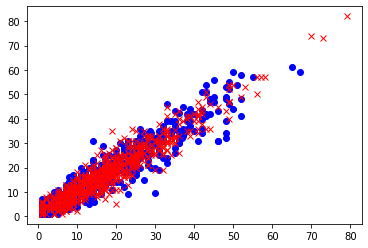

In [53]:
from __future__ import division
import numpy as np
from sys import stdout
from sklearn.metrics import pairwise_kernels

a=df14['SiteEngName'].unique()
opv=[]
for i in range(18):
    a1=(df4[df14.SiteEngName==a[i]])
    a2=(df5[df15.SiteEngName==a[i]])
    a3=(df6[df16.SiteEngName==a[i]])
    a4=(df7[df17.SiteEngName==a[i]])
    a5=(df8[df18.SiteEngName==a[i]])
    b2=a5.PM
    b1=a4.PM
   #b3=a3.PM
    #b4=a4.PM
    #b5=a5.PM
    print('==============')
    print(a[i])
    a45=b1.values.reshape((-1, 10))
    a46=b2.values.reshape((-1, 10))
    
    if __name__ == '__main__':

        import matplotlib.pyplot as plt
        from sklearn.metrics import pairwise_distances

        np.random.seed(0)

        m = 20
        n = 20
        d = 2

        sigma2X = np.eye(d)
        muX = np.zeros(d)

        sigma2Y = np.eye(d)
        muY = np.ones(d)
        # muY = np.zeros(d)

        iterations = 10000

        #X = np.random.multivariate_normal(mean=muX, cov=sigma2X, size=m)
        #Y = np.random.multivariate_normal(mean=muY, cov=sigma2Y, size=n)
        X=a45
        Y=a46

        if d == 2:
            plt.figure()
            plt.plot(X[:, 0], X[:, 1], 'bo')
            plt.plot(Y[:, 0], Y[:, 1], 'rx')

        sigma2 = np.median(pairwise_distances(X, Y, metric='euclidean'))**2
        mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
                                                            kernel_function='rbf',
                                                            gamma=1.0/sigma2,
                                                            verbose=True)
        # mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
        #                                                     kernel_function='linear',
        #                                                     verbose=True)

        ##prob, bins, patches = plt.hist(mmd2u_null, bins=50, density=True)
        op=mmd2u
        opv.append(op)
        plt.plot(mmd2u, prob.max()/30, 'w*', markersize=24, markeredgecolor='k',
                 markeredgewidth=2, label="$MMD^2_u = %s$" % mmd2u)
        plt.xlabel('$MMD^2_u$')
        plt.ylabel('$p(MMD^2_u)$')
        plt.legend(numpoints=1)
        plt.title('$MMD^2_u$: null-distribution and observed value. $p$-value=%s'
                  % p_value)

In [35]:
column_values=['MMD'] 
df_mmd = pd.DataFrame(data = opv,  
                  index = a,  
                  columns = column_values) 
  
# displaying the dataframe 
print(df_mmd) 
print(df_mmd.nlargest(5, ['MMD']))
print(df_mmd.nsmallest(5, ['MMD']) )

           MMD
Banqiao    NaN
Cailiao    NaN
Datong     NaN
Guting     NaN
Linkou     NaN
Sanchong   NaN
Shilin     NaN
Songshan   NaN
Tamsui     NaN
Tucheng    NaN
Wanhua     NaN
Wanli      NaN
Xindian    NaN
Xinzhuang  NaN
Xizhi      NaN
Yangming   NaN
Yonghe     NaN
Zhongshan  NaN


TypeError: Column 'MMD' has dtype object, cannot use method 'nlargest' with this dtype

Banqiao
MMD^2_u = -0.001392372161885147
Computing the null distribution.


TypeError: cannot unpack non-iterable NoneType object

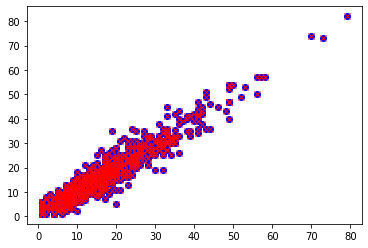

In [36]:
from __future__ import division
import numpy as np
from sys import stdout
from sklearn.metrics import pairwise_kernels

a=df14['SiteEngName'].unique()
opv=[]
for i in range(18):
    a1=(df4[df14.SiteEngName==a[i]])
    a2=(df5[df15.SiteEngName==a[i]])
    a3=(df6[df16.SiteEngName==a[i]])
    a4=(df7[df17.SiteEngName==a[i]])
    a5=(df8[df18.SiteEngName==a[i]])
    b1=a4.PM
    b1=a5.PM
   #b3=a3.PM
    #b4=a4.PM
    #b5=a5.PM
    print('==============')
    print(a[i])
    a45=b1.values.reshape((-1, 10))
    a46=b2.values.reshape((-1, 10))
    
    if __name__ == '__main__':

        import matplotlib.pyplot as plt
        from sklearn.metrics import pairwise_distances

        np.random.seed(0)

        m = 20
        n = 20
        d = 2

        sigma2X = np.eye(d)
        muX = np.zeros(d)

        sigma2Y = np.eye(d)
        muY = np.ones(d)
        # muY = np.zeros(d)

        iterations = 10000

        #X = np.random.multivariate_normal(mean=muX, cov=sigma2X, size=m)
        #Y = np.random.multivariate_normal(mean=muY, cov=sigma2Y, size=n)
        X=a45
        Y=a46

        if d == 2:
            plt.figure()
            plt.plot(X[:, 0], X[:, 1], 'bo')
            plt.plot(Y[:, 0], Y[:, 1], 'rx')

        sigma2 = np.median(pairwise_distances(X, Y, metric='euclidean'))**2
        mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
                                                            kernel_function='rbf',
                                                            gamma=1.0/sigma2,
                                                            verbose=True)
        # mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
        #                                                     kernel_function='linear',
        #                                                     verbose=True)

        ##prob, bins, patches = plt.hist(mmd2u_null, bins=50, density=True)
        op=mmd2u
        opv.append(op)
        plt.plot(mmd2u, prob.max()/30, 'w*', markersize=24, markeredgecolor='k',
                 markeredgewidth=2, label="$MMD^2_u = %s$" % mmd2u)
        plt.xlabel('$MMD^2_u$')
        plt.ylabel('$p(MMD^2_u)$')
        plt.legend(numpoints=1)
        plt.title('$MMD^2_u$: null-distribution and observed value. $p$-value=%s'
                  % p_value)

In [37]:
column_values=['MMD'] 
df_mmd = pd.DataFrame(data = opv,  
                  index = a,  
                  columns = column_values) 
  
# displaying the dataframe 
print(df_mmd) 
print(df_mmd.nlargest(5, ['MMD']))
print(df_mmd.nsmallest(5, ['MMD']) )

           MMD
Banqiao    NaN
Cailiao    NaN
Datong     NaN
Guting     NaN
Linkou     NaN
Sanchong   NaN
Shilin     NaN
Songshan   NaN
Tamsui     NaN
Tucheng    NaN
Wanhua     NaN
Wanli      NaN
Xindian    NaN
Xinzhuang  NaN
Xizhi      NaN
Yangming   NaN
Yonghe     NaN
Zhongshan  NaN


TypeError: Column 'MMD' has dtype object, cannot use method 'nlargest' with this dtype

In [38]:
df14 = dfa4.rename(columns={"PM2.5": "PM"})
df15 = dfa5.rename(columns={"PM2.5": "PM"})
df4= pd.DataFrame(df14)
df5= pd.DataFrame(df15)
r=(df4[dfa4.SiteEngName =='Banqiao'])
s=(df5[dfa5.SiteEngName =='Banqiao'])
t=(df6[df16.SiteEngName =='Banqiao'])
u=(df7[df17.SiteEngName =='Banqiao'])
v=(df8[df18.SiteEngName =='Banqiao'])
#print(r.PM==s.PM)
#print(r.PM)

p=r.PM
q=s.PM
p
p1=t.PM[:8760]
q1=u.PM
p2=v.PM;

In [39]:
p1=t.PM[:8760]
q

0         70.92
18        75.29
36        69.96
54        62.96
72        54.25
          ...  
157590    67.00
157608    70.00
157626    70.00
157644    67.00
157662    60.00
Name: PM, Length: 8760, dtype: float64

# example of kernel density estimation for a bimodal data sample
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
from numpy import asarray
from numpy import exp
from sklearn.neighbors import KernelDensity
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))
# fit density
model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)
# sample probabilities for a range of outcomes
values = asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = exp(probabilities)
# plot the histogram and pdf
pyplot.hist(sample, bins=50, density=True)
pyplot.plot(values[:], probabilities)
pyplot.show()

In [40]:
a45=p.values.reshape((-1, 10))
a46=q.values.reshape((-1, 10))
a45

array([[26.  , 28.  , 30.  , ..., 33.  , 32.  , 31.  ],
       [31.  , 34.  , 35.  , ..., 26.  , 28.  , 27.  ],
       [31.  , 31.  , 26.  , ..., 26.  , 28.  , 27.  ],
       ...,
       [42.  , 41.  , 45.  , ..., 33.  , 29.  , 24.  ],
       [28.  , 34.  , 38.  , ..., 30.73, 28.52, 26.73],
       [24.71, 24.21, 22.75, ..., 30.13, 41.21, 56.92]])

MMD^2_u = 0.0029618352927858194
Computing the null distribution.
0


KeyboardInterrupt: 

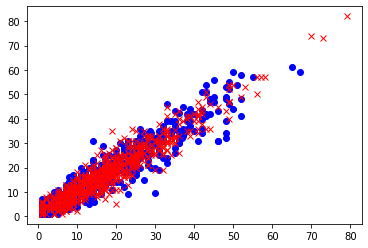

In [54]:
from __future__ import division
import numpy as np
from sys import stdout
from sklearn.metrics import pairwise_kernels


def MMD2u(K, m, n):
    """The MMD^2_u unbiased statistic.
    """
    Kx = K[:m, :m]
    Ky = K[m:, m:]
    Kxy = K[:m, m:]
    return 1.0 / (m * (m - 1.0)) * (Kx.sum() - Kx.diagonal().sum()) + \
        1.0 / (n * (n - 1.0)) * (Ky.sum() - Ky.diagonal().sum()) - \
        2.0 / (m * n) * Kxy.sum()


def compute_null_distribution(K, m, n, iterations=10000, verbose=False,
                              random_state=None, marker_interval=1000):
    """Compute the bootstrap null-distribution of MMD2u.
    """
    if type(random_state) == type(np.random.RandomState()):
        rng = random_state
    else:
        rng = np.random.RandomState(random_state)

    mmd2u_null = np.zeros(iterations)
    for i in range(iterations):
        if verbose and (i % marker_interval) == 0:
            print(i),
            stdout.flush()
        idx = rng.permutation(m+n)
        K_i = K[idx, idx[:, None]]
        mmd2u_null[i] = MMD2u(K_i, m, n)

    if verbose:
        print("")

    return mmd2u_null


def compute_null_distribution_given_permutations(K, m, n, permutation,
                                                 iterations=None):
    """Compute the bootstrap null-distribution of MMD2u given
    predefined permutations.
    Note:: verbosity is removed to improve speed.
    """
    if iterations is None:
        iterations = len(permutation)

    mmd2u_null = np.zeros(iterations)
    for i in range(iterations):
        idx = permutation[i]
        K_i = K[idx, idx[:, None]]
        mmd2u_null[i] = MMD2u(K_i, m, n)

    return mmd2u_null


def kernel_two_sample_test(X, Y, kernel_function='rbf', iterations=10000,
                           verbose=False, random_state=None, **kwargs):
    """Compute MMD^2_u, its null distribution and the p-value of the
    kernel two-sample test.
    Note that extra parameters captured by **kwargs will be passed to
    pairwise_kernels() as kernel parameters. E.g. if
    kernel_two_sample_test(..., kernel_function='rbf', gamma=0.1),
    then this will result in getting the kernel through
    kernel_function(metric='rbf', gamma=0.1).
    """
    m = len(X)
    n = len(Y)
    XY = np.vstack([X, Y])
    K = pairwise_kernels(XY, metric=kernel_function, **kwargs)
    mmd2u = MMD2u(K, m, n)
    if verbose:
        print("MMD^2_u = %s" % mmd2u)
        print("Computing the null distribution.")

    mmd2u_null = compute_null_distribution(K, m, n, iterations,
                                           verbose=verbose,
                                           random_state=random_state)
    p_value = max(1.0/iterations, (mmd2u_null > mmd2u).sum() /
                  float(iterations))
    if verbose:
        print("p-value ~= %s \t (resolution : %s)" % (p_value, 1.0/iterations))

    return mmd2u, mmd2u_null, p_value


if __name__ == '__main__':

    import matplotlib.pyplot as plt
    from sklearn.metrics import pairwise_distances

    np.random.seed(0)

    m = 20
    n = 20
    d = 2

    sigma2X = np.eye(d)
    muX = np.zeros(d)

    sigma2Y = np.eye(d)
    muY = np.ones(d)
    # muY = np.zeros(d)

    iterations = 10000

    #X = np.random.multivariate_normal(mean=muX, cov=sigma2X, size=m)
    #Y = np.random.multivariate_normal(mean=muY, cov=sigma2Y, size=n)
    X=a45
    Y=a46

    if d == 2:
        plt.figure()
        plt.plot(X[:, 0], X[:, 1], 'bo')
        plt.plot(Y[:, 0], Y[:, 1], 'rx')

    sigma2 = np.median(pairwise_distances(X, Y, metric='euclidean'))**2
    mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
                                                        kernel_function='rbf',
                                                        gamma=1.0/sigma2,
                                                        verbose=True)
    # mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
    #                                                     kernel_function='linear',
    #                                                     verbose=True)

    plt.figure()
    prob, bins, patches = plt.hist(mmd2u_null, bins=50, density=True)
    plt.plot(mmd2u, prob.max()/30, 'w*', markersize=24, markeredgecolor='k',
             markeredgewidth=2, label="$MMD^2_u = %s$" % mmd2u)
    plt.xlabel('$MMD^2_u$')
    plt.ylabel('$p(MMD^2_u)$')
    plt.legend(numpoints=1)
    plt.title('$MMD^2_u$: null-distribution and observed value. $p$-value=%s'
              % p_value)

In [56]:
a45q=q.values.reshape((-1, 10))
a46r=p1.values.reshape((-1, 10))
a45q

array([[70.92, 75.29, 69.96, ..., 43.79, 45.43, 45.08],
       [42.88, 38.79, 33.96, ..., 19.42, 18.13, 15.83],
       [13.46, 12.25, 11.46, ..., 12.17, 13.58, 14.08],
       ...,
       [15.  , 15.  , 14.  , ..., 12.  , 10.  , 10.  ],
       [13.  , 15.  , 19.  , ..., 33.  , 46.  , 53.  ],
       [57.  , 62.  , 59.  , ..., 70.  , 67.  , 60.  ]])

MMD^2_u = 0.017257428675160114
Computing the null distribution.
0
1000
2000
3000
4000
5000
6000
7000
8000
9000

p-value ~= 0.0001 	 (resolution : 0.0001)


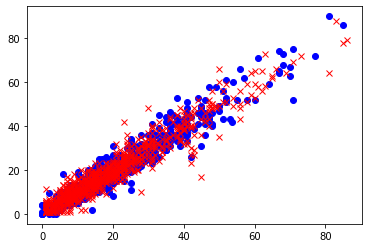

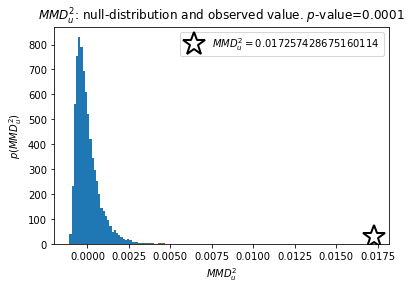

In [57]:
from __future__ import division
import numpy as np
from sys import stdout
from sklearn.metrics import pairwise_kernels


def MMD2u(K, m, n):
    """The MMD^2_u unbiased statistic.
    """
    Kx = K[:m, :m]
    Ky = K[m:, m:]
    Kxy = K[:m, m:]
    return 1.0 / (m * (m - 1.0)) * (Kx.sum() - Kx.diagonal().sum()) + \
        1.0 / (n * (n - 1.0)) * (Ky.sum() - Ky.diagonal().sum()) - \
        2.0 / (m * n) * Kxy.sum()


def compute_null_distribution(K, m, n, iterations=10000, verbose=False,
                              random_state=None, marker_interval=1000):
    """Compute the bootstrap null-distribution of MMD2u.
    """
    if type(random_state) == type(np.random.RandomState()):
        rng = random_state
    else:
        rng = np.random.RandomState(random_state)

    mmd2u_null = np.zeros(iterations)
    for i in range(iterations):
        if verbose and (i % marker_interval) == 0:
            print(i),
            stdout.flush()
        idx = rng.permutation(m+n)
        K_i = K[idx, idx[:, None]]
        mmd2u_null[i] = MMD2u(K_i, m, n)

    if verbose:
        print("")

    return mmd2u_null


def compute_null_distribution_given_permutations(K, m, n, permutation,
                                                 iterations=None):
    """Compute the bootstrap null-distribution of MMD2u given
    predefined permutations.
    Note:: verbosity is removed to improve speed.
    """
    if iterations is None:
        iterations = len(permutation)

    mmd2u_null = np.zeros(iterations)
    for i in range(iterations):
        idx = permutation[i]
        K_i = K[idx, idx[:, None]]
        mmd2u_null[i] = MMD2u(K_i, m, n)

    return mmd2u_null


def kernel_two_sample_test(X, Y, kernel_function='rbf', iterations=10000,
                           verbose=False, random_state=None, **kwargs):
    """Compute MMD^2_u, its null distribution and the p-value of the
    kernel two-sample test.
    Note that extra parameters captured by **kwargs will be passed to
    pairwise_kernels() as kernel parameters. E.g. if
    kernel_two_sample_test(..., kernel_function='rbf', gamma=0.1),
    then this will result in getting the kernel through
    kernel_function(metric='rbf', gamma=0.1).
    """
    m = len(X)
    n = len(Y)
    XY = np.vstack([X, Y])
    K = pairwise_kernels(XY, metric=kernel_function, **kwargs)
    mmd2u = MMD2u(K, m, n)
    if verbose:
        print("MMD^2_u = %s" % mmd2u)
        print("Computing the null distribution.")

    mmd2u_null = compute_null_distribution(K, m, n, iterations,
                                           verbose=verbose,
                                           random_state=random_state)
    p_value = max(1.0/iterations, (mmd2u_null > mmd2u).sum() /
                  float(iterations))
    if verbose:
        print("p-value ~= %s \t (resolution : %s)" % (p_value, 1.0/iterations))

    return mmd2u, mmd2u_null, p_value


if __name__ == '__main__':

    import matplotlib.pyplot as plt
    from sklearn.metrics import pairwise_distances

    np.random.seed(0)

    m = 20
    n = 20
    d = 2

    sigma2X = np.eye(d)
    muX = np.zeros(d)

    sigma2Y = np.eye(d)
    muY = np.ones(d)
    # muY = np.zeros(d)

    iterations = 10000

    #X = np.random.multivariate_normal(mean=muX, cov=sigma2X, size=m)
    #Y = np.random.multivariate_normal(mean=muY, cov=sigma2Y, size=n)
    X=a45q
    Y=a46r

    if d == 2:
        plt.figure()
        plt.plot(X[:, 0], X[:, 1], 'bo')
        plt.plot(Y[:, 0], Y[:, 1], 'rx')

    sigma2 = np.median(pairwise_distances(X, Y, metric='euclidean'))**2
    mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
                                                        kernel_function='rbf',
                                                        gamma=1.0/sigma2,
                                                        verbose=True)
    # mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
    #                                                     kernel_function='linear',
    #                                                     verbose=True)

    plt.figure()
    prob, bins, patches = plt.hist(mmd2u_null, bins=50, density=True)
    plt.plot(mmd2u, prob.max()/30, 'w*', markersize=24, markeredgecolor='k',
             markeredgewidth=2, label="$MMD^2_u = %s$" % mmd2u)
    plt.xlabel('$MMD^2_u$')
    plt.ylabel('$p(MMD^2_u)$')
    plt.legend(numpoints=1)
    plt.title('$MMD^2_u$: null-distribution and observed value. $p$-value=%s'
              % p_value)

In [8]:
from __future__ import division
import numpy as np
from sys import stdout
from sklearn.metrics import pairwise_kernels


def MMD2u(K, m, n):
    """The MMD^2_u unbiased statistic.
    """
    Kx = K[:m, :m]
    Ky = K[m:, m:]
    Kxy = K[:m, m:]
    return 1.0 / (m * (m - 1.0)) * (Kx.sum() - Kx.diagonal().sum()) + \
        1.0 / (n * (n - 1.0)) * (Ky.sum() - Ky.diagonal().sum()) - \
        2.0 / (m * n) * Kxy.sum()


def compute_null_distribution(K, m, n, iterations=10000, verbose=False,
                              random_state=None, marker_interval=1000):
    """Compute the bootstrap null-distribution of MMD2u.
    """
    if type(random_state) == type(np.random.RandomState()):
        rng = random_state
    else:
        rng = np.random.RandomState(random_state)

    mmd2u_null = np.zeros(iterations)
    for i in range(iterations):
        if verbose and (i % marker_interval) == 0:
            print(i),
            stdout.flush()
        idx = rng.permutation(m+n)
        K_i = K[idx, idx[:, None]]
        mmd2u_null[i] = MMD2u(K_i, m, n)

    if verbose:
        print("")

    return mmd2u_null


def compute_null_distribution_given_permutations(K, m, n, permutation,
                                                 iterations=None):
    """Compute the bootstrap null-distribution of MMD2u given
    predefined permutations.
    Note:: verbosity is removed to improve speed.
    """
    if iterations is None:
        iterations = len(permutation)

    mmd2u_null = np.zeros(iterations)
    for i in range(iterations):
        idx = permutation[i]
        K_i = K[idx, idx[:, None]]
        mmd2u_null[i] = MMD2u(K_i, m, n)

    return mmd2u_null


def kernel_two_sample_test(X, Y, kernel_function='rbf', iterations=10000,
                           verbose=False, random_state=None, **kwargs):
    """Compute MMD^2_u, its null distribution and the p-value of the
    kernel two-sample test.
    Note that extra parameters captured by **kwargs will be passed to
    pairwise_kernels() as kernel parameters. E.g. if
    kernel_two_sample_test(..., kernel_function='rbf', gamma=0.1),
    then this will result in getting the kernel through
    kernel_function(metric='rbf', gamma=0.1).
    """
    m = len(X)
    n = len(Y)
    XY = np.vstack([X, Y])
    K = pairwise_kernels(XY, metric=kernel_function, **kwargs)
    mmd2u = MMD2u(K, m, n)
    if verbose:
        print("MMD^2_u = %s" % mmd2u)
        print("Computing the null distribution.")

    #mmd2u_null = compute_null_distribution(K, m, n, iterations,
    #                                       verbose=verbose,
     #                                      random_state=random_state)
   # p_value = max(1.0/iterations, (mmd2u_null > mmd2u).sum() /
    #              float(iterations))
    if verbose:
        print("p-value ~= %s \t (resolution : %s)" % (p_value, 1.0/iterations))

    return mmd2u, mmd2u_null, p_value


if __name__ == '__main__':

    import matplotlib.pyplot as plt
    from sklearn.metrics import pairwise_distances

    np.random.seed(0)

    m = 20
    n = 20
    d = 2

    sigma2X = np.eye(d)
    muX = np.zeros(d)

    sigma2Y = np.eye(d)
    muY = np.ones(d)
    # muY = np.zeros(d)

    iterations = 10000

    #X = np.random.multivariate_normal(mean=muX, cov=sigma2X, size=m)
    #Y = np.random.multivariate_normal(mean=muY, cov=sigma2Y, size=n)
    X=a45q
    Y=a46r

    if d == 2:
        plt.figure()
        plt.plot(X[:, 0], X[:, 1], 'bo')
        plt.plot(Y[:, 0], Y[:, 1], 'rx')

    sigma2 = np.median(pairwise_distances(X, Y, metric='euclidean'))**2
    mmd2u,mmd2u_null,p_value = kernel_two_sample_test(X, Y,
                                                kernel_function='rbf',
                                                gamma=1.0/sigma2,
                                                verbose=True)
    # mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
    #                                                     kernel_function='linear',
    #                                                     verbose=True)

    plt.figure()
    prob, bins, patches = plt.hist(mmd2u_null, bins=50, density=True)
    plt.plot(mmd2u, prob.max()/30, 'w*', markersize=24, markeredgecolor='k',
             markeredgewidth=2, label="$MMD^2_u = %s$" % mmd2u)
    plt.xlabel('$MMD^2_u$')
    plt.ylabel('$p(MMD^2_u)$')
    plt.legend(numpoints=1)
    plt.title('$MMD^2_u$: null-distribution and observed value. $p$-value=%s'
              % p_value)

NameError: name 'a45q' is not defined

In [60]:
a45p1=p1.values.reshape((-1, 10))
a46q1=q1.values.reshape((-1, 10))

MMD^2_u = 0.005502503889324939
Computing the null distribution.
p-value ~= 0.0001 	 (resolution : 0.0001)


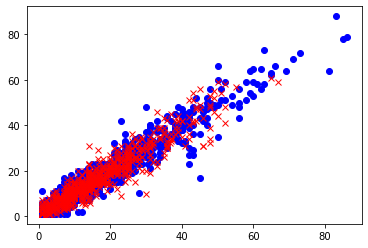

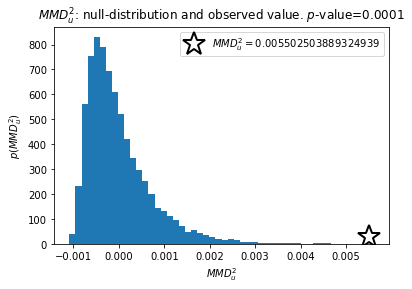

In [61]:
if __name__ == '__main__':

    import matplotlib.pyplot as plt
    from sklearn.metrics import pairwise_distances

    np.random.seed(0)

    m = 20
    n = 20
    d = 2

    sigma2X = np.eye(d)
    muX = np.zeros(d)

    sigma2Y = np.eye(d)
    muY = np.ones(d)
    # muY = np.zeros(d)

    iterations = 10000

    #X = np.random.multivariate_normal(mean=muX, cov=sigma2X, size=m)
    #Y = np.random.multivariate_normal(mean=muY, cov=sigma2Y, size=n)
    X=a45p1
    Y=a46q1

    if d == 2:
        plt.figure()
        plt.plot(X[:, 0], X[:, 1], 'bo')
        plt.plot(Y[:, 0], Y[:, 1], 'rx')

    sigma2 = np.median(pairwise_distances(X, Y, metric='euclidean'))**2
    mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
                                                        kernel_function='rbf',
                                                        gamma=1.0/sigma2,
                                                        verbose=True)
    # mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
    #                                                     kernel_function='linear',
    #                                                     verbose=True)

    plt.figure()
    prob, bins, patches = plt.hist(mmd2u_null, bins=50, density=True)
    plt.plot(mmd2u, prob.max()/30, 'w*', markersize=24, markeredgecolor='k',
             markeredgewidth=2, label="$MMD^2_u = %s$" % mmd2u)
    plt.xlabel('$MMD^2_u$')
    plt.ylabel('$p(MMD^2_u)$')
    plt.legend(numpoints=1)
    plt.title('$MMD^2_u$: null-distribution and observed value. $p$-value=%s'
              % p_value)

MMD^2_u = 0.03862081638998227
Computing the null distribution.
0
1000
2000
3000
4000
5000
6000
7000
8000
9000

p-value ~= 0.1173 	 (resolution : 0.0001)


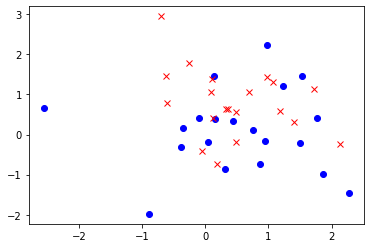

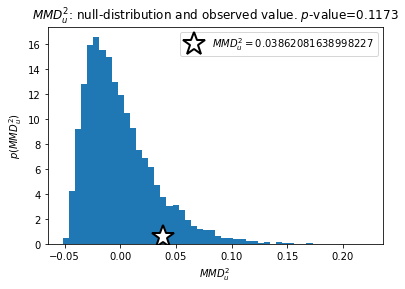

In [7]:
from __future__ import division
import numpy as np
from sys import stdout
from sklearn.metrics import pairwise_kernels


def MMD2u(K, m, n):
    """The MMD^2_u unbiased statistic.
    """
    Kx = K[:m, :m]
    Ky = K[m:, m:]
    Kxy = K[:m, m:]
    return 1.0 / (m * (m - 1.0)) * (Kx.sum() - Kx.diagonal().sum()) + \
        1.0 / (n * (n - 1.0)) * (Ky.sum() - Ky.diagonal().sum()) - \
        2.0 / (m * n) * Kxy.sum()


def compute_null_distribution(K, m, n, iterations=10000, verbose=False,
                              random_state=None, marker_interval=1000):
    """Compute the bootstrap null-distribution of MMD2u.
    """
    if type(random_state) == type(np.random.RandomState()):
        rng = random_state
    else:
        rng = np.random.RandomState(random_state)

    mmd2u_null = np.zeros(iterations)
    for i in range(iterations):
        if verbose and (i % marker_interval) == 0:
            print(i),
            stdout.flush()
        idx = rng.permutation(m+n)
        K_i = K[idx, idx[:, None]]
        mmd2u_null[i] = MMD2u(K_i, m, n)

    if verbose:
        print("")

    return mmd2u_null


def compute_null_distribution_given_permutations(K, m, n, permutation,
                                                 iterations=None):
    """Compute the bootstrap null-distribution of MMD2u given
    predefined permutations.
    Note:: verbosity is removed to improve speed.
    """
    if iterations is None:
        iterations = len(permutation)

    mmd2u_null = np.zeros(iterations)
    for i in range(iterations):
        idx = permutation[i]
        K_i = K[idx, idx[:, None]]
        mmd2u_null[i] = MMD2u(K_i, m, n)

    return mmd2u_null


def kernel_two_sample_test(X, Y, kernel_function='rbf', iterations=10000,
                           verbose=False, random_state=None, **kwargs):
    """Compute MMD^2_u, its null distribution and the p-value of the
    kernel two-sample test.
    Note that extra parameters captured by **kwargs will be passed to
    pairwise_kernels() as kernel parameters. E.g. if
    kernel_two_sample_test(..., kernel_function='rbf', gamma=0.1),
    then this will result in getting the kernel through
    kernel_function(metric='rbf', gamma=0.1).
    """
    m = len(X)
    n = len(Y)
    XY = np.vstack([X, Y])
    K = pairwise_kernels(XY, metric=kernel_function, **kwargs)
    mmd2u = MMD2u(K, m, n)
    if verbose:
        print("MMD^2_u = %s" % mmd2u)
        print("Computing the null distribution.")

    mmd2u_null = compute_null_distribution(K, m, n, iterations,
                                           verbose=verbose,
                                           random_state=random_state)
    p_value = max(1.0/iterations, (mmd2u_null > mmd2u).sum() /
                  float(iterations))
    if verbose:
        print("p-value ~= %s \t (resolution : %s)" % (p_value, 1.0/iterations))

    return mmd2u, mmd2u_null, p_value


if __name__ == '__main__':

    import matplotlib.pyplot as plt
    from sklearn.metrics import pairwise_distances

    np.random.seed(0)

    m = 20
    n = 20
    d = 2

    sigma2X = np.eye(d)
    muX = np.zeros(d)

    sigma2Y = np.eye(d)
    muY = np.ones(d)
    # muY = np.zeros(d)

    iterations = 10000

    X = np.random.multivariate_normal(mean=muX, cov=sigma2X, size=m)
    Y = np.random.multivariate_normal(mean=muY, cov=sigma2Y, size=n)

    if d == 2:
        plt.figure()
        plt.plot(X[:, 0], X[:, 1], 'bo')
        plt.plot(Y[:, 0], Y[:, 1], 'rx')

    sigma2 = np.median(pairwise_distances(X, Y, metric='euclidean'))**2
    mmd2u, mmd2u_null,p_value = kernel_two_sample_test(X, Y,
                                                kernel_function='rbf',
                                                gamma=1.0/sigma2,
                                                verbose=True)
    # mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
    #                                                     kernel_function='linear',
    #                                                     verbose=True)

    plt.figure()
    prob, bins, patches = plt.hist(mmd2u_null, bins=50, density=True)
    plt.plot(mmd2u, prob.max()/30, 'w*', markersize=24, markeredgecolor='k',
             markeredgewidth=2, label="$MMD^2_u = %s$" % mmd2u)
    plt.xlabel('$MMD^2_u$')
    plt.ylabel('$p(MMD^2_u)$')
    plt.legend(numpoints=1)
    plt.title('$MMD^2_u$: null-distribution and observed value. $p$-value=%s'
              % p_value)

In [11]:
#Run first then run last 

In [14]:
from __future__ import division
import numpy as np
from sys import stdout
from sklearn.metrics import pairwise_kernels


def MMD2u(K, m, n):
    """The MMD^2_u unbiased statistic.
    """
    Kx = K[:m, :m]
    Ky = K[m:, m:]
    Kxy = K[:m, m:]
    return 1.0 / (m * (m - 1.0)) * (Kx.sum() - Kx.diagonal().sum()) + \
        1.0 / (n * (n - 1.0)) * (Ky.sum() - Ky.diagonal().sum()) - \
        2.0 / (m * n) * Kxy.sum()


def kernel_two_sample_test(X, Y, kernel_function='rbf', iterations=10000,
                           verbose=False, random_state=None, **kwargs):
    """Compute MMD^2_u, its null distribution and the p-value of the
    kernel two-sample test.
    Note that extra parameters captured by **kwargs will be passed to
    pairwise_kernels() as kernel parameters. E.g. if
    kernel_two_sample_test(..., kernel_function='rbf', gamma=0.1),
    then this will result in getting the kernel through
    kernel_function(metric='rbf', gamma=0.1).
    """
    m = len(X)
    n = len(Y)
    XY = np.vstack([X, Y])
    K = pairwise_kernels(XY, metric=kernel_function, **kwargs)
    mmd2u = MMD2u(K, m, n)
    
    if verbose:
        print("MMD^2_u = %s" % mmd2u)
        print("Computing the null distribution.")

    mmd2u_null = compute_null_distribution(K, m, n, iterations,
             #                              verbose=verbose,
               #                            random_state=random_state)
    p_value = max(1.0/iterations, (mmd2u_null > mmd2u).sum() /
             #     float(iterations))
    if verbose:
        print("p-value ~= %s \t (resolution : %s)" % (p_value, 1.0/iterations))

    return mmd2u, p_value


if __name__ == '__main__':

    import matplotlib.pyplot as plt
    from sklearn.metrics import pairwise_distances

    np.random.seed(0)

    m = 20
    n = 20
    d = 2

    sigma2X = np.eye(d)
    muX = np.zeros(d)

    sigma2Y = np.eye(d)
    muY = np.ones(d)
    # muY = np.zeros(d)

    iterations = 10000

    X = np.random.multivariate_normal(mean=muX, cov=sigma2X, size=m)
    Y = np.random.multivariate_normal(mean=muY, cov=sigma2Y, size=n)

    if d == 2:
        plt.figure()
        plt.plot(X[:, 0], X[:, 1], 'bo')
        plt.plot(Y[:, 0], Y[:, 1], 'rx')

    sigma2 = np.median(pairwise_distances(X, Y, metric='euclidean'))**2
    mmd2u, p_value = kernel_two_sample_test(X, Y,
                                            kernel_function='rbf',
                                            gamma=1.0/sigma2,
                                            verbose=True)
    # mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
    #                                                     kernel_function='linear',
    #                                                     verbose=True)

    plt.figure()
    #prob, bins, patches = plt.hist(mmd2u_null, bins=50, density=True)
    plt.plot(mmd2u, prob.max()/30, 'w*', markersize=24, markeredgecolor='k',
             markeredgewidth=2, label="$MMD^2_u = %s$" % mmd2u)
    plt.xlabel('$MMD^2_u$')
    plt.ylabel('$p(MMD^2_u)$')
    plt.legend(numpoints=1)
    #plt.title('$MMD^2_u$: null-distribution and observed value. $p$-value=%s'
     #         % p_value)

SyntaxError: invalid syntax (<ipython-input-14-66dc45e1e5ab>, line 43)

In [15]:
da2=np.reshape(df1, (20,-1))
da3=np.reshape(df2, (20,-1))
da3

NameError: name 'df1' is not defined

In [16]:
from __future__ import division
import numpy as np
from sys import stdout
from sklearn.metrics import pairwise_kernels
pr1 = asarray([0.10, 0.40, 0.50])
qr1 = asarray([0.80, 0.15, 0.05])
def MMD2u(K, m, n):
    """The MMD^2_u unbiased statistic.
    """
    Kx = K[:m, :m]
    Ky = K[m:, m:]
    Kxy = K[:m, m:]
    return 1.0 / (m * (m - 1.0)) * (Kx.sum() - Kx.diagonal().sum()) + \
        1.0 / (n * (n - 1.0)) * (Ky.sum() - Ky.diagonal().sum()) - \
        2.0 / (m * n) * Kxy.sum()


def compute_null_distribution(K, m, n, iterations=100000, verbose=False,
                              random_state=None, marker_interval=10000):
    """Compute the bootstrap null-distribution of MMD2u.
    """
    if type(random_state) == type(np.random.RandomState()):
        rng = random_state
    else:
        rng = np.random.RandomState(random_state)

    mmd2u_null = np.zeros(iterations)
    for i in range(iterations):
        if verbose and (i % marker_interval) == 0:
            print(i),
            stdout.flush()
        idx = rng.permutation(m+n)
        K_i = K[idx, idx[:, None]]
        mmd2u_null[i] = MMD2u(K_i, m, n)

    if verbose:
        print("")

    return mmd2u_null


def compute_null_distribution_given_permutations(K, m, n, permutation,
                                                 iterations=None):
    """Compute the bootstrap null-distribution of MMD2u given
    predefined permutations.
    Note:: verbosity is removed to improve speed.
    """
    if iterations is None:
        iterations = len(permutation)

    mmd2u_null = np.zeros(iterations)
    for i in range(iterations):
        idx = permutation[i]
        K_i = K[idx, idx[:, None]]
        mmd2u_null[i] = MMD2u(K_i, m, n)

    return mmd2u_null


def kernel_two_sample_test(X, Y, kernel_function='rbf', iterations=10000,
                           verbose=False, random_state=None, **kwargs):
    """Compute MMD^2_u, its null distribution and the p-value of the
    kernel two-sample test.
    Note that extra parameters captured by **kwargs will be passed to
    pairwise_kernels() as kernel parameters. E.g. if
    kernel_two_sample_test(..., kernel_function='rbf', gamma=0.1),
    then this will result in getting the kernel through
    kernel_function(metric='rbf', gamma=0.1).
    """
    m = len(X)
    n = len(Y)
    XY = np.vstack([X, Y])
    K = pairwise_kernels(XY, metric=kernel_function, **kwargs)
    mmd2u = MMD2u(K, m, n)
    if verbose:
        print("MMD^2_u = %s" % mmd2u)
        print("Computing the null distribution.")

    mmd2u_null = compute_null_distribution(K, m, n, iterations,
                                           verbose=verbose,
                                           random_state=random_state)
    p_value = max(1.0/iterations, (mmd2u_null > mmd2u).sum() /
                  float(iterations))
    if verbose:
        print("p-value ~= %s \t (resolution : %s)" % (p_value, 1.0/iterations))

    return mmd2u, mmd2u_null, p_value

if __name__ == '__main__':

    import matplotlib.pyplot as plt
    from sklearn.metrics import pairwise_distances

    np.random.seed(0)

    m = 200
    n = 200
    d = 20

    sigma2X = np.eye(d)
    muX = np.zeros(d)

    sigma2Y = np.eye(d)
    muY = np.ones(d)
    # muY = np.zeros(d)

    iterations = 100000

    #X = np.random.multivariate_normal(mean=muX, cov=sigma2X, size=m)
    #Y = np.random.multivariate_normal(mean=muY, cov=sigma2Y, size=n)
    X=da2
    Y=da3

    if d == 2:
        plt.figure()
        plt.plot(X[:, 0], X[:, 1], 'bo')
        plt.plot(Y[:, 0], Y[:, 1], 'rx')

    sigma2 = np.median(pairwise_distances(X, Y, metric='euclidean'))**2
    mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
                                                        kernel_function='rbf',
                                                        gamma=1.0/sigma2,
                                                        verbose=True)
    # mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
    #                                                     kernel_function='linear',
    #                                                     verbose=True)

    plt.figure()
    prob, bins, patches = plt.hist(mmd2u_null, bins=50, density=True)
    plt.plot(mmd2u, prob.max()/30, 'w*', markersize=24, markeredgecolor='k',
             markeredgewidth=2, label="$MMD^2_u = %s$" % mmd2u)
    plt.xlabel('$MMD^2_u$')
    plt.ylabel('$p(MMD^2_u)$')
    plt.legend(numpoints=1)
    plt.title('$MMD^2_u$: null-distribution and observed value. $p$-value=%s'
              % p_value)

NameError: name 'da2' is not defined

In [46]:
pr1 = ([ 415,  940, 1037, 1010,  826,  759,  879,  602,  519,  403,  360,
        250,  180,  151,  131,   62,   56,   35,   31,   25])

qr1 = ([ 613, 1220, 1079, 1216,  697,  808,  692,  481,  510,  298,  294,
        185,  179,  120,  113,   70,   68,   40,   29,   2])
pr11=np.reshape(pr1,(2,-2))
qr11=np.reshape(qr1,(2,-2))
pr11

array([[ 415,  940, 1037, 1010,  826,  759,  879,  602,  519,  403],
       [ 360,  250,  180,  151,  131,   62,   56,   35,   31,   25]])

MMD^2_u = -0.8644214818231173
Computing the null distribution.
0

p-value ~= 0.6641 	 (resolution : 0.0001)


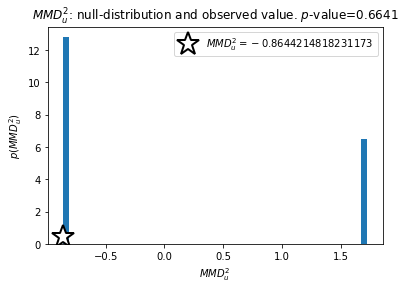

In [47]:
from __future__ import division
import numpy as np
from numpy import *

from sys import stdout
from sklearn.metrics import pairwise_kernels

def MMD2u(K, m, n):
    """The MMD^2_u unbiased statistic.
    """
    Kx = K[:m, :m]
    Ky = K[m:, m:]
    Kxy = K[:m, m:]
    return 1.0 / (m * (m - 1.0)) * (Kx.sum() - Kx.diagonal().sum()) + \
        1.0 / (n * (n - 1.0)) * (Ky.sum() - Ky.diagonal().sum()) - \
        2.0 / (m * n) * Kxy.sum()


def compute_null_distribution(K, m, n, iterations=100000, verbose=False,
                              random_state=None, marker_interval=10000):
    """Compute the bootstrap null-distribution of MMD2u.
    """
    if type(random_state) == type(np.random.RandomState()):
        rng = random_state
    else:
        rng = np.random.RandomState(random_state)

    mmd2u_null = np.zeros(iterations)
    for i in range(iterations):
        if verbose and (i % marker_interval) == 0:
            print(i),
            stdout.flush()
        idx = rng.permutation(m+n)
        K_i = K[idx, idx[:, None]]
        mmd2u_null[i] = MMD2u(K_i, m, n)

    if verbose:
        print("")

    return mmd2u_null


def compute_null_distribution_given_permutations(K, m, n, permutation,
                                                 iterations=None):
    """Compute the bootstrap null-distribution of MMD2u given
    predefined permutations.
    Note:: verbosity is removed to improve speed.
    """
    if iterations is None:
        iterations = len(permutation)

    mmd2u_null = np.zeros(iterations)
    for i in range(iterations):
        idx = permutation[i]
        K_i = K[idx, idx[:, None]]
        mmd2u_null[i] = MMD2u(K_i, m, n)

    return mmd2u_null


def kernel_two_sample_test(X, Y, kernel_function='rbf', iterations=10000,
                           verbose=False, random_state=None, **kwargs):
    """Compute MMD^2_u, its null distribution and the p-value of the
    kernel two-sample test.
    Note that extra parameters captured by **kwargs will be passed to
    pairwise_kernels() as kernel parameters. E.g. if
    kernel_two_sample_test(..., kernel_function='rbf', gamma=0.1),
    then this will result in getting the kernel through
    kernel_function(metric='rbf', gamma=0.1).
    """
    m = len(X)
    n = len(Y)
    XY = np.vstack([X, Y])
    K = pairwise_kernels(XY, metric=kernel_function, **kwargs)
    mmd2u = MMD2u(K, m, n)
    if verbose:
        print("MMD^2_u = %s" % mmd2u)
        print("Computing the null distribution.")

    mmd2u_null = compute_null_distribution(K, m, n, iterations,
                                           verbose=verbose,
                                           random_state=random_state)
    p_value = max(1.0/iterations, (mmd2u_null > mmd2u).sum() /
                  float(iterations))
    if verbose:
        print("p-value ~= %s \t (resolution : %s)" % (p_value, 1.0/iterations))

    return mmd2u, mmd2u_null, p_value

if __name__ == '__main__':

    import matplotlib.pyplot as plt
    from sklearn.metrics import pairwise_distances

    np.random.seed(0)

    m = 200
    n = 200
    d = 20

    sigma2X = np.eye(d)
    muX = np.zeros(d)

    sigma2Y = np.eye(d)
    muY = np.ones(d)
    # muY = np.zeros(d)

    iterations = 100000

    #X = np.random.multivariate_normal(mean=muX, cov=sigma2X, size=m)
    #Y = np.random.multivariate_normal(mean=muY, cov=sigma2Y, size=n)
    X=pr11
    Y=qr11

    if d == 2:
        plt.figure()
        plt.plot(X[:, 0], X[:, 1], 'bo')
        plt.plot(Y[:, 0], Y[:, 1], 'rx')

    sigma2 = np.median(pairwise_distances(X, Y, metric='euclidean'))**2
    mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
                                                        kernel_function='rbf',
                                                        gamma=1.0/sigma2,
                                                        verbose=True)
    # mmd2u, mmd2u_null, p_value = kernel_two_sample_test(X, Y,
    #                                                     kernel_function='linear',
    #                                                     verbose=True)

    plt.figure()
    prob, bins, patches = plt.hist(mmd2u_null, bins=50, density=True)
    plt.plot(mmd2u, prob.max()/30, 'w*', markersize=24, markeredgecolor='k',
             markeredgewidth=2, label="$MMD^2_u = %s$" % mmd2u)
    plt.xlabel('$MMD^2_u$')
    plt.ylabel('$p(MMD^2_u)$')
    plt.legend(numpoints=1)
    plt.title('$MMD^2_u$: null-distribution and observed value. $p$-value=%s'
              % p_value)

In [19]:
XY

NameError: name 'XY' is not defined

In [20]:
da2

NameError: name 'da2' is not defined

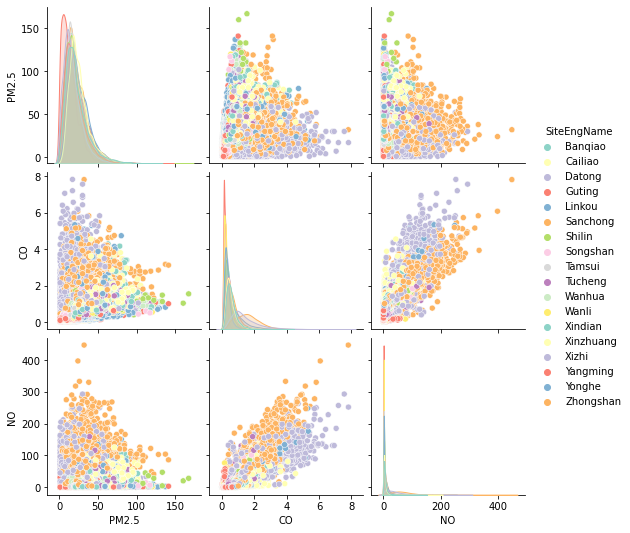

In [19]:
import seaborn as sns
sns.pairplot(data=df, hue='SiteEngName', palette='Set3')

In [20]:
###

import sys
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import minimum_spanning_tree

SIGNIFICANCE = 0.05


def mst_edges(V, k):
    """
    Construct the approximate minimum spanning tree from vectors V
    :param: V: 2D array, sequence of vectors
    :param: k: int the number of neighbor to consider for each vector
    :return: V ndarray of edges forming the MST
    """

    # k = len(X)-1 gives the exact MST
    k = min(len(V) - 1, k)

    # generate a sparse graph using the k nearest neighbors of each point
    G = kneighbors_graph(V, n_neighbors=k, mode='distance')

    # Compute the minimum spanning tree of this graph
    full_tree = minimum_spanning_tree(G, overwrite=True)

    return np.array(full_tree.nonzero()).T


def ww_test(X, Y, k=10):
    """
    Multi-dimensional Wald-Wolfowitz test
    :param X: multivariate sample X as a numpy ndarray
    :param Y: multivariate sample Y as a numpy ndarray
    :param k: number of neighbors to consider for each vector
    :return: W the WW test statistic, R the number of runs
    """
    m, n = len(X), len(Y)
    N = m + n

    XY = np.concatenate([X, Y]).astype(np.float)

    # XY += np.random.normal(0, noise_scale, XY.shape)

    edges = mst_edges(XY, k)

    labels = np.array([0] * m + [1] * n)

    c = labels[edges]
    runs_edges = edges[c[:, 0] == c[:, 1]]

    # number of runs is the total number of observations minus edges within each run
    R = N - len(runs_edges)

    # expected value of R
    e_R = ((2.0 * m * n) / N) + 1

    # variance of R is _numer/_denom
    _numer = 2 * m * n * (2 * m * n - N)
    _denom = N ** 2 * (N - 1)

    # see Eq. 1 in Friedman 1979
    # W approaches a standard normal distribution
    W = (R - e_R) / np.sqrt(_numer/_denom)

    return W, R


if __name__ == '__main__':
    if len(sys.argv) != 3:
        print('Usage: $ python runs_test.py [X] [Y]')
        sys.exit(1)

    #X = pd.read_csv(sys.argv[1], header=None).values
    #Y = pd.read_csv(sys.argv[2], header=None).values
    X=da2
    Y=da3

    W, R = ww_test(X, Y)
    pvalue = stats.norm.cdf(W)  # one sided test
    reject = pvalue <= SIGNIFICANCE

    print('W = %.3f, %d runs' % (W, R))
    print('p = %.4f' % pvalue)
    print('%s H_0 at 0.05 significance level' % ('Reject' if reject else 'Fail to reject'))
    print('The samples appear to have %s distribution' % ('different' if reject else 'similar'))

NameError: name 'da2' is not defined

In [ ]:
import pandas as pd
from scipy.stats import ks_2samp

#df = pd.read_csv('E:\\DataSet.csv')
#data1 = df.iloc[:,0]
#data2 = df.iloc[:,1]
test = ks_2samp(df4,df5)
print(test)

In [51]:
t_dist

0.07461788558462634

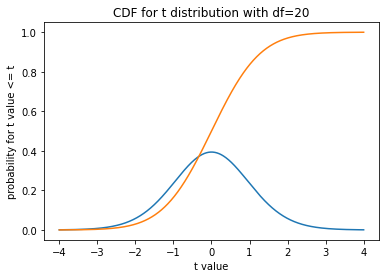

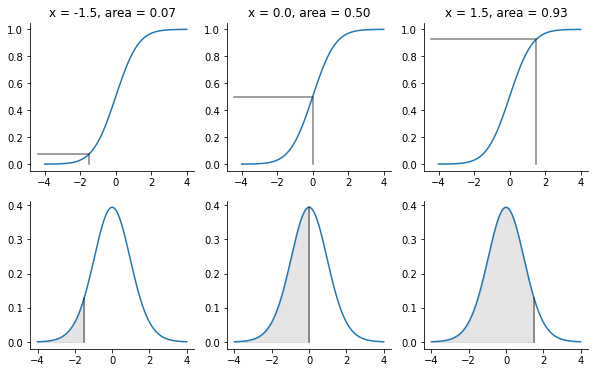

In [49]:
import numpy as np
np.set_printoptions(precision=4)  # print arrays to 4 decimal places
import matplotlib.pyplot as plt

# If running in the IPython console, consider running `%matplotlib` to enable
# interactive plots.  If running in the Jupyter Notebook, use `%matplotlib
# inline`.
#
# Imagine I have a t statistic with 20 degrees of freedom.
#
# [Scipy](https://www.scipy.org/scipylib/index.html) provides a [t distribution class](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) that we can use to get values
# from the t statistic [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) (PDF).
#
# As a start, we plot the PDF for a t statistic with 20 degrees of freedom:

import scipy.stats
# Make a t distribution object for t with 20 degrees of freedom
t_dist = scipy.stats.t(20)
# Plot the PDF
t_values = np.linspace(-4, 4, 1000)
plt.plot(t_values, t_dist.pdf(t_values))
plt.xlabel('t value')
plt.ylabel('probability for t value')
plt.title('PDF for t distribution with df=20')

# The t distribution object `t_dist` can also give us the [cumulative
# distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF).  The CDF gives the area under the curve of the
# PDF at and to the left of the given t value:

# Plot the CDF
plt.plot(t_values, t_dist.cdf(t_values))
plt.xlabel('t value')
plt.ylabel('probability for t value <= t')
plt.title('CDF for t distribution with df=20')

# Say I have a t value $x$ drawn from a t distribution with 20 degrees of
# freedom.  The PDF gives the probability for given values of $x$.  Because it
# is a probability density, the sum of the probabilities of all possible
# values for $x$: $\infty < x < \infty$ must be 1.  Therefore the total area
# under the PDF curve is 1, and the maximum value of the CDF is 1.
#
# The CDF gives us the area under the PDF curve at and to the left of a given t
# value $x$.  Therefore it is the probability that we will observe a value $x <=
# t$ if we sample a value $x$ from a t distribution of (here) 20 degrees of
# freedom.

# Show relationship of PDF and CDF for three example t values.
example_values = (-1.5, 0, 1.5)
pdf_values = t_dist.pdf(t_values)
cdf_values = t_dist.cdf(t_values)
fill_color = (0, 0, 0, 0.1)  # Light gray in RGBA format.
line_color = (0, 0, 0, 0.5)  # Medium gray in RGBA format.
fig, axes = plt.subplots(2, len(example_values), figsize=(10, 6))
for i, x in enumerate(example_values):
    cdf_ax, pdf_ax = axes[:, i]
    cdf_ax.plot(t_values, cdf_values)
    pdf_ax.plot(t_values, pdf_values)
    # Fill area at and to the left of x.
    pdf_ax.fill_between(t_values, pdf_values,
                        where=t_values <= x,
                        color=fill_color)
    pd = t_dist.pdf(x)  # Probability density at this value.
    # Line showing position of x on x-axis of PDF plot.
    pdf_ax.plot([x, x],
                [0, pd], color=line_color)
    cd = t_dist.cdf(x)  # Cumulative distribution value for this x.
    # Lines showing x and CDF value on CDF plot.
    x_ax_min = cdf_ax.axis()[0]  # x position of y axis on plot.
    cdf_ax.plot([x, x, x_ax_min],
                [0, cd, cd], color=line_color)
    cdf_ax.set_title('x = {:.1f}, area = {:.2f}'.format(x, cd))
    # Hide top and right axis lines and ticks to reduce clutter.
    for ax in (cdf_ax, pdf_ax):
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')

# For example, say I have drawn a t value $x$ at random from a t distribution
# with 20 degrees of freedom.  The probability that $x <= 1.5$ is:

# Area of PDF at and to the left of 1.5
t_dist.cdf(1.5)

# The total area under the PDF is 1, and the maximum value for the CDF is 1.
# Therefore the area of the PDF to the *right* of 1.5 must be:

# Area of PDF to the right of 1.5
1 - t_dist.cdf(1.5)


Text(0.5, 1.0, 'CDF for t distribution with df=20')

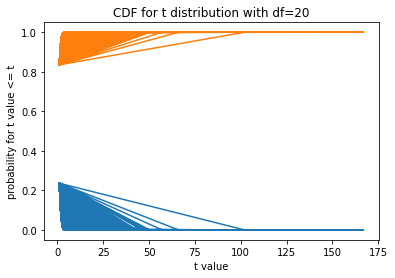

In [59]:
import scipy.stats
# Make a t distribution object for t with 20 degrees of freedom
t_dist = scipy.stats.t(20)
# Plot the PDF
t_values = df1
plt.plot(t_values, t_dist.pdf(t_values))
plt.xlabel('t value')
plt.ylabel('probability for t value')
plt.title('PDF for t distribution with df=20')

# The t distribution object `t_dist` can also give us the [cumulative
# distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF).  The CDF gives the area under the curve of the
# PDF at and to the left of the given t value:

# Plot the CDF
plt.plot(t_values, t_dist.cdf(t_values))
plt.xlabel('t value')
plt.ylabel('probability for t value <= t')
plt.title('CDF for t distribution with df=20')


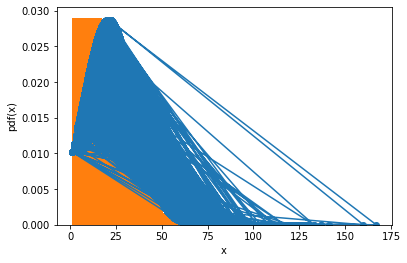

In [64]:
import numpy as np
import scipy.stats as stats
import pylab as pl

#h = sorted([186, 176, 158, 180, 186, 168, 168, 164, 178, 170, 189, 195, 172,
#     187, 180, 186, 185, 168, 179, 178, 183, 179, 170, 175, 186, 159,
#     161, 178, 175, 185, 175, 162, 173, 172, 177, 175, 172, 177, 180])  #sorted
h=df1
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h,density=True)      #use this to draw histogram of your data

plt.xlabel('x')
plt.ylabel('pdf(x)')

pl.show()  

In [67]:
from __future__ import division, print_function
import os

import numpy as np
from scipy import linalg, stats
try:
    import modshogun as sg
except ImportError:  # new versions just call it shogun
    import shogun as sg

if 'OMP_NUM_THREADS' in os.environ:
    num_threads = int(os.environ['OMP_NUM_THREADS'])
else:
    import multiprocessing as mp
    num_threads = mp.cpu_count()
sg.get_global_parallel().set_num_threads(num_threads)


def rbf_mmd_test(X, Y, bandwidth='median', null_samples=1000,
                 median_samples=1000, cache_size=32):
    '''
    Run an MMD test using a Gaussian kernel.
    Parameters
    ----------
    X : row-instance feature array
    Y : row-instance feature array
    bandwidth : float or 'median'
        The bandwidth of the RBF kernel (sigma).
        If 'median', estimates the median pairwise distance in the
        aggregate sample and uses that.
    null_samples : int
        How many times to sample from the null distribution.
    median_samples : int
        How many points to use for estimating the bandwidth.
    Returns
    -------
    p_val : float
        The obtained p value of the test.
    stat : float
        The test statistic.
    null_samples : array of length null_samples
        The samples from the null distribution.
    bandwidth : float
        The used kernel bandwidth
    '''

    if bandwidth == 'median':
        from sklearn.metrics.pairwise import euclidean_distances
        sub = lambda feats, n: feats[np.random.choice(
            feats.shape[0], min(feats.shape[0], n), replace=False)]
        Z = np.r_[sub(X, median_samples // 2), sub(Y, median_samples // 2)]
        D2 = euclidean_distances(Z, squared=True)
        upper = D2[np.triu_indices_from(D2, k=1)]
        kernel_width = np.median(upper, overwrite_input=True)
        bandwidth = np.sqrt(kernel_width / 2)
        # sigma = median / sqrt(2); works better, sometimes at least
        del Z, D2, upper
    else:
        kernel_width = 2 * bandwidth**2

    mmd = sg.QuadraticTimeMMD()
    mmd.set_p(sg.RealFeatures(X.T.astype(np.float64)))
    mmd.set_q(sg.RealFeatures(Y.T.astype(np.float64)))
    mmd.set_kernel(sg.GaussianKernel(cache_size, kernel_width))

    mmd.set_num_null_samples(null_samples)
    samps = mmd.sample_null()
    stat = mmd.compute_statistic()

    p_val = np.mean(stat <= samps)
    return p_val, stat, samps, bandwidth


def linear_mmd_test(X, Y, null_samples=1000):
    mmd = sg.QuadraticTimeMMD()
    mmd.set_p(sg.RealFeatures(X.T.astype(np.float64)))
    mmd.set_q(sg.RealFeatures(Y.T.astype(np.float64)))
    mmd.set_kernel(sg.LinearKernel())

    mmd.set_num_null_samples(null_samples)
    samps = mmd.sample_null()
    stat = mmd.compute_statistic()

    p_val = np.mean(stat <= samps)
    return p_val, stat, samps


def linear_hotelling_test(X, Y, reg=0):
    n, p = X.shape
    Z = X - Y
    Z_bar = Z.mean(axis=0)

    Z -= Z_bar
    S = Z.T.dot(Z)
    S /= (n - 1)
    if reg:
        S[::p + 1] += reg
    # z' inv(S) z = z' inv(L L') z = z' inv(L)' inv(L) z = ||inv(L) z||^2
    L = linalg.cholesky(S, lower=True, overwrite_a=True)
    Linv_Z_bar = linalg.solve_triangular(L, Z_bar, lower=True, overwrite_b=True)
    stat = n * Linv_Z_bar.dot(Linv_Z_bar)

    p_val = stats.chi2.sf(stat, p)
    return p_val, stat

AttributeError: module 'shogun' has no attribute 'get_global_parallel'

###	Pvalue
Dongshan	0.987311
Shanhua	0.957917
Xinying	0.945179
Puli	0.944590
Datong	0.938838

Pvalue
Chiayi	0.037214
Songshan	0.040234
Fengyuan	0.043167
Xingang	0.076680
Sanyi	0.176619

In [106]:
df1re=np.reshape(df1,(1,-11))
df1re

array([[26., 40., 40., ..., 70., 59., 42.]])

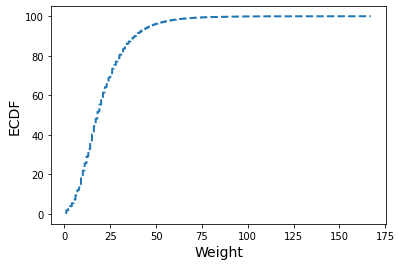

In [116]:
# Generate x and y values for ECDF: x, y
import numpy as np # array manipulation
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import dc_stat_think as dcst # ecdf estimation
x, y = dcst.ecdf(as1)
# Plot the ECDF as dots
_ = plt.plot(x, y*100, linestyle='--', lw = 2)
# Label axes and show plot
_ = plt.xlabel('PM2.5', size = 14)
_ = plt.ylabel('ECDF', size = 14)
plt.show()

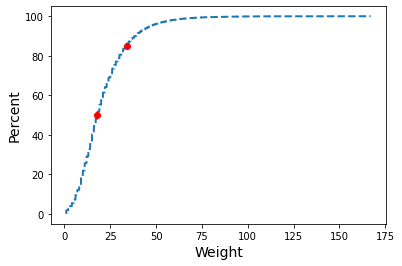

In [142]:
percentiles = np.array([50 , 85])
pct_val = np.percentile(weight, percentiles)
x, y = dcst.ecdf(weight)
_ = plt.plot(x, y*100, linestyle='--', lw = 2)
_ = plt.xlabel('Weight', size = 14)
_ = plt.ylabel('Percent', size = 14)
_ = plt.plot(pct_val, percentiles, marker='o', color='red',
         linestyle='none')
plt.show()

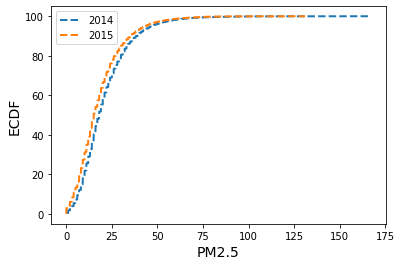

In [145]:

# Generate x and y values for ECDF: x, y
x_male, y_male = dcst.ecdf(weight)
x_female, y_female = dcst.ecdf(female_weight)
# Plot the ECDF as dots
_ = plt.plot(x_male, y_male*100, linestyle='--', lw = 2)
_ = plt.plot(x_female, y_female*100, linestyle='--', lw = 2)
# Label axes and show plot
_ = plt.legend(("2014", "2015"))
_ = plt.xlabel('PM2.5', size = 14)
_ = plt.ylabel('ECDF', size = 14)
plt.show()

In [143]:
weight = df_ar['PM2.5']
female_weight=df_ar.PM15

In [158]:
print("""
50th and 85th Percentile values are: {0:.2f} and {1:.2f}
""".format(*np.percentile(weight, [50, 85])))


50th and 85th Percentile values are: 18.00 and 34.00



In [41]:
as1=df4['PM']
as2=df5['PM']

In [45]:
df4
df4.to_csv('Kh.csv')
df_ar= pd.read_csv("Kh.csv")
df_ar['PM15']=df5
df_ar['Name']=dfa4['SiteEngName']


ValueError: Wrong number of items passed 32, placement implies 1

In [43]:
df_ar = df_ar.rename(columns = {'PM2.5': 'PM14'}, inplace = False)
df_ar

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,SiteEngName,sn,AMB_TEMP,CH4,CO,NMHC,NO,...,WIND_DIREC,WIND_SPEED,WIND_cos,WIND_sin,WS_HR,W_HR_cos,W_HR_sin,lat,lon,read_time
0,0,1,2,Banqiao,板橋,16.00,1.70,0.62,0.25,1.8,...,97.00,0.90,-0.109682,0.893292,1.30,0.245868,-1.276538,"(25.01, 25.02)","(121.45, 121.46)",2014-01-01T00:00:00+00:00
1,1,2,3,Cailiao,菜寮,15.00,2.13,1.82,0.43,44.0,...,309.00,0.50,0.314660,-0.388573,0.40,0.037122,-0.398274,"(25.06, 25.07)","(121.48, 121.49)",2014-01-01T00:00:00+00:00
2,2,8,9,Datong,大同,14.48,2.40,2.51,0.81,70.0,...,152.05,1.46,-1.289701,0.684303,1.28,0.080200,-0.474311,"(25.06, 25.07)","(121.51, 121.52)",2014-01-01T00:00:00+00:00
3,3,18,19,Guting,古亭,15.00,2.10,1.32,0.36,21.0,...,142.00,1.00,-0.788011,0.615661,0.90,0.718647,-0.541800,"(25.02, 25.03)","(121.52, 121.53)",2014-01-01T00:00:00+00:00
4,4,25,26,Linkou,林口,14.00,2.13,0.73,0.43,1.3,...,89.00,1.60,0.027924,1.599756,1.00,0.999373,0.035398,"(25.07, 25.08)","(121.36, 121.37)",2014-01-01T00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157675,157675,665748,665749,Xinzhuang,新莊,16.00,2.03,0.77,0.21,0.8,...,60.00,7.10,3.550000,6.148780,6.40,-6.397744,-0.169927,"(25.03, 25.04)","(121.43, 121.44)",2014-12-31T23:00:00+00:00
157676,157676,665750,665751,Xizhi,汐止,17.00,2.03,0.75,0.21,1.4,...,65.00,2.60,1.098807,2.356400,1.80,-1.387944,1.146128,"(25.06, 25.07)","(121.64, 121.65)",2014-12-31T23:00:00+00:00
157677,157677,665751,665752,Yangming,陽明,8.50,2.03,0.64,0.21,0.5,...,79.52,4.41,0.802145,4.336434,3.88,-0.922274,0.157282,"(25.18, 25.19)","(121.52, 121.53)",2014-12-31T23:00:00+00:00
157678,157678,665753,665754,Yonghe,永和,17.00,2.00,0.94,0.23,2.3,...,81.00,4.70,0.735242,4.642135,3.70,2.873738,-2.330586,"(25.01, 25.02)","(121.51, 121.52)",2014-12-31T23:00:00+00:00


In [44]:
male_weight = df_ar[df_ar.SiteEngName == "Banqiao"].PM14
female_weight = df_ar[df_ar.Name == "Banqiao"].PM15

# Generate x and y values for ECDF: x, y
x_male, y_male = dcst.ecdf(male_weight)
x_female, y_female = dcst.ecdf(female_weight)
# Plot the ECDF as dots
_ = plt.plot(x_male, y_male*100, linestyle='--', lw = 2)
_ = plt.plot(x_female, y_female*100, linestyle='--', lw = 2)
# Label axes and show plot
_ = plt.legend(("2014", "2015"))
_ = plt.xlabel('Banqiao', size = 14)
_ = plt.ylabel('ECDF', size = 14)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Name'

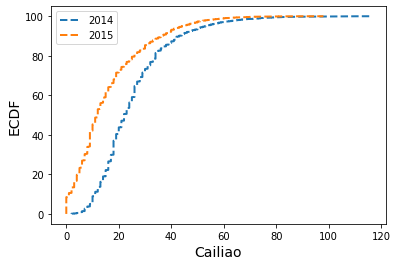

In [156]:
male_weight = df_ar[df_ar.Name == "Cailiao"].PM14
female_weight = df_ar[df_ar.Name == "Cailiao"].PM15

# Generate x and y values for ECDF: x, y
x_male, y_male = dcst.ecdf(male_weight)
x_female, y_female = dcst.ecdf(female_weight)
# Plot the ECDF as dots
_ = plt.plot(x_male, y_male*100, linestyle='--', lw = 2)
_ = plt.plot(x_female, y_female*100, linestyle='--', lw = 2)
# Label axes and show plot
_ = plt.legend(("2014", "2015"))
_ = plt.xlabel('Cailiao', size = 14)
_ = plt.ylabel('ECDF', size = 14)
plt.show()

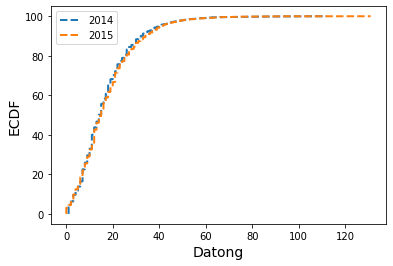

In [157]:
male_weight = df_ar[df_ar.Name == "Datong"].PM14
female_weight = df_ar[df_ar.Name == "Datong"].PM15

# Generate x and y values for ECDF: x, y
x_male, y_male = dcst.ecdf(male_weight)
x_female, y_female = dcst.ecdf(female_weight)
# Plot the ECDF as dots
_ = plt.plot(x_male, y_male*100, linestyle='--', lw = 2)
_ = plt.plot(x_female, y_female*100, linestyle='--', lw = 2)
# Label axes and show plot
_ = plt.legend(("2014", "2015"))
_ = plt.xlabel('Datong', size = 14)
_ = plt.ylabel('ECDF', size = 14)
plt.show()

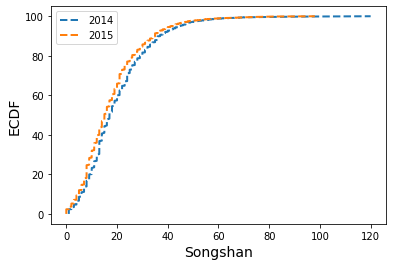

In [275]:
male_weight = df_ar[df_ar.Name == "Songshan"].PM14
female_weight = df_ar[df_ar.Name == "Songshan"].PM15

# Generate x and y values for ECDF: x, y
x_male, y_male = dcst.ecdf(male_weight)
x_female, y_female = dcst.ecdf(female_weight)
# Plot the ECDF as dots
_ = plt.plot(x_male, y_male*100, linestyle='--', lw = 2)
_ = plt.plot(x_female, y_female*100, linestyle='--', lw = 2)
# Label axes and show plot
_ = plt.legend(("2014", "2015"))
_ = plt.xlabel('Songshan', size = 14)
_ = plt.ylabel('ECDF', size = 14)
plt.show()